# A-P vs I-P

### Load data

In [1]:
from src.preprocessing import *
from src.benchmarks import *
from src.models import *
 
print('...loading the dataset from mongodb...')
X_0, y_0 = load_data('bio_dataset', 'GM12878', 'A-P', 'I-P', 'epigenomic')
X_1, y_1 = load_data('bio_dataset', 'HelaS3', 'A-P', 'I-P', 'epigenomic')
X_2, y_2 = load_data('bio_dataset', 'HepG2', 'A-P', 'I-P', 'epigenomic')
X_3, y_3 = load_data('bio_dataset', 'K562', 'A-P', 'I-P', 'epigenomic')
print('...dataset loaded...')

Using TensorFlow backend.
W0627 16:36:29.015015 139660677420672 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
/usr/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


...loading the dataset from mongodb...
...dataset loaded...


### Split data between training, validation and test set

In [2]:
X_train = [[] for i in range(4)]
X_test = [[] for i in range(4)]
X_val = [[] for i in range(4)]
y_train = [[] for i in range(4)]
y_test = [[] for i in range(4)]
y_val = [[] for i in range(4)]

print('...splitting between training-set and test-set...')
print()

X_train[0], X_test[0], y_train[0], y_test[0] = splitting(X_0, y_0, 0.2)
X_train[0], X_val[0], y_train[0], y_val[0] = splitting(X_train[0], y_train[0], 0.2)

print(f'[GM12878] # samples in training-set: {len(X_train[0])}')
print(f'[GM12878] # samples in test-set: {len(X_test[0])}')
print(f'[GM12878] # samples in validation-set: {len(X_val[0])}')
print()

X_train[1], X_test[1], y_train[1], y_test[1] = splitting(X_1, y_1, 0.2)
X_train[1], X_val[1], y_train[1], y_val[1] = splitting(X_train[1], y_train[1], 0.2)

print(f'[HelaS3] # samples in training-set: {len(X_train[1])}')
print(f'[HelaS3] # samples in test-set: {len(X_test[1])}')
print(f'[HelaS3] # samples in validation-set: {len(X_val[1])}')
print()

X_train[2], X_test[2], y_train[2], y_test[2] = splitting(X_2, y_2, 0.2)
X_train[2], X_val[2], y_train[2], y_val[2] = splitting(X_train[2], y_train[2], 0.2)

print(f'[HepG2] # samples in training-set: {len(X_train[2])}')
print(f'[HepG2] # samples in test-set: {len(X_test[2])}')
print(f'[HepG2] # samples in validation-set: {len(X_val[2])}')
print()

X_train[3], X_test[3], y_train[3], y_test[3] = splitting(X_3, y_3, 0.2)
X_train[3], X_val[3], y_train[3], y_val[3] = splitting(X_train[3], y_train[3], 0.2)

print(f'[K562] # samples in training-set: {len(X_train[3])}')
print(f'[K562] # samples in test-set: {len(X_test[3])}')
print(f'[K562] # samples in validation-set: {len(X_val[3])}')

...splitting between training-set and test-set...

[GM12878] # samples in training-set: 54212
[GM12878] # samples in test-set: 16942
[GM12878] # samples in validation-set: 13553

[HelaS3] # samples in training-set: 57448
[HelaS3] # samples in test-set: 17953
[HelaS3] # samples in validation-set: 14362

[HepG2] # samples in training-set: 68896
[HepG2] # samples in test-set: 21531
[HepG2] # samples in validation-set: 17224

[K562] # samples in training-set: 59459
[K562] # samples in test-set: 18581
[K562] # samples in validation-set: 14865


### Balance data

In [3]:
X_train_adasyn = [[] for i in range(4)]
y_train_adasyn = [[] for i in range(4)]
X_train_smoteenn = [[] for i in range(4)]
y_train_smoteenn = [[] for i in range(4)]


print('...oversampling training-set with ADASYN...')

X_train_adasyn[0], y_train_adasyn[0] = oversampling_adasyn(X_train[0], y_train[0])
print(f'[GM12878] # samples: {len(X_train_adasyn[0])} (active: {(y_train_adasyn[0] == 1).sum()}, inactive: {(y_train_adasyn[0] == 0).sum()})')

X_train_adasyn[1], y_train_adasyn[1] = oversampling_adasyn(X_train[1], y_train[1])
print(f'[HelaS3] # samples: {len(X_train_adasyn[1])} (active: {(y_train_adasyn[1] == 1).sum()}, inactive: {(y_train_adasyn[1] == 0).sum()})')

X_train_adasyn[2], y_train_adasyn[2] = oversampling_adasyn(X_train[2], y_train[2])
print(f'[HepG2] # samples: {len(X_train_adasyn[2])} (active: {(y_train_adasyn[2] == 1).sum()}, inactive: {(y_train_adasyn[2] == 0).sum()})')

X_train_adasyn[3], y_train_adasyn[3] = oversampling_adasyn(X_train[3], y_train[3])
print(f'[K562] # samples: {len(X_train_adasyn[3])} (active: {(y_train_adasyn[3] == 1).sum()}, inactive: {(y_train_adasyn[3] == 0).sum()})')

print()
print('...oversampling training-set with SMOTEENN...')

X_train_smoteenn[0], y_train_smoteenn[0] = sampling_smoteenn(X_train[0], y_train[0])
print(f'[GM12878] # samples: {len(X_train_smoteenn[0])} (active: {(y_train_smoteenn[0] == 1).sum()}, inactive: {(y_train_smoteenn[0] == 0).sum()})')

X_train_smoteenn[1], y_train_smoteenn[1] = sampling_smoteenn(X_train[1], y_train[1])
print(f'[HelaS3] # samples: {len(X_train_smoteenn[1])} (active: {(y_train_smoteenn[1] == 1).sum()}, inactive: {(y_train_smoteenn[1] == 0).sum()})')

X_train_smoteenn[2], y_train_smoteenn[2] = sampling_smoteenn(X_train[2], y_train[2])
print(f'[HepG2] # samples: {len(X_train_smoteenn[2])} (active: {(y_train_smoteenn[2] == 1).sum()}, inactive: {(y_train_smoteenn[2] == 0).sum()})')

X_train_smoteenn[3], y_train_smoteenn[3] = sampling_smoteenn(X_train[3], y_train[3])
print(f'[K562] # samples: {len(X_train_smoteenn[3])} (active: {(y_train_smoteenn[3] == 1).sum()}, inactive: {(y_train_smoteenn[3] == 0).sum()})')

...oversampling training-set with ADASYN...
[GM12878] # samples: 94737 (active: 47421, inactive: 47316)
[HelaS3] # samples: 100828 (active: 50295, inactive: 50533)
[HepG2] # samples: 123226 (active: 61656, inactive: 61570)
[K562] # samples: 106248 (active: 53165, inactive: 53083)

...oversampling training-set with SMOTEENN...
[GM12878] # samples: 92691 (active: 47288, inactive: 45403)
[HelaS3] # samples: 99695 (active: 50491, inactive: 49204)
[HepG2] # samples: 116997 (active: 61363, inactive: 55634)
[K562] # samples: 105009 (active: 53071, inactive: 51938)


## Benchmarks with the first MLP (2 layers, (256, 256))

In [4]:
import matplotlib.pyplot as plt

history = [[] for i in range(4)]
y_pred_adasyn = [[] for i in range(4)]
y_pred_smoteenn = [[] for i in range(4)]
scores_adasyn = [[] for i in range(4)]
scores_smoteenn = [[] for i in range(4)]

inputs = [101, 74, 72, 135]
names = ["GM12878", "HelaS3", "HepG2", "K562"]

for i in range(4):
    model = dense1(inputs[i])
    history[i] = model.fit(X_train_adasyn[i], y_train_adasyn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_adasyn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_adasyn[i] = (total, one, zero)

for i in range(4):
    model = dense1(inputs[i])
    history[i] = model.fit(X_train_smoteenn[i], y_train_smoteenn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_smoteenn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_smoteenn[i] = (total, one, zero)
    
results_adasyn = [(names[i] + ' adasyn', y_test[i], y_pred_adasyn[i]) for i in range(4)]
results_smoteenn = [(names[i] + ' smoteenn', y_test[i], y_pred_smoteenn[i]) for i in range(4)]
results = results_adasyn + results_smoteenn

W0627 17:21:09.516083 139660677420672 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 17:21:09.527683 139660677420672 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 17:21:09.529527 139660677420672 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 17:21:09.540410 139660677420672 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0627 17:21:09.546392 139660677420672 deprecat

...building the mlp...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               26112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 92,161
Trainable params: 92,161
Non-trainable params: 0
_________________________________________________________________
None
Train on 94737 samples, validate on 13553 samples
Epoch 1/150
94737/94737 [==============================] - 2s 24us/step - loss: 0.2628 - acc: 0.9018 - auc_acc: 0.9327 - f1_acc: 0.9020 - precision_acc: 0.9248 - recall_acc: 0.8852 - val_loss:

94737/94737 [==============================] - 2s 19us/step - loss: 0.0128 - acc: 0.9969 - auc_acc: 0.9978 - f1_acc: 0.9969 - precision_acc: 0.9950 - recall_acc: 0.9989 - val_loss: 0.0480 - val_acc: 0.9911 - val_auc_acc: 0.9978 - val_f1_acc: 0.9665 - val_precision_acc: 0.9590 - val_recall_acc: 0.9761
Epoch 51/150
94737/94737 [==============================] - 2s 19us/step - loss: 0.0129 - acc: 0.9970 - auc_acc: 0.9978 - f1_acc: 0.9970 - precision_acc: 0.9948 - recall_acc: 0.9992 - val_loss: 0.0482 - val_acc: 0.9911 - val_auc_acc: 0.9978 - val_f1_acc: 0.9659 - val_precision_acc: 0.9584 - val_recall_acc: 0.9756
Epoch 52/150
94737/94737 [==============================] - 2s 19us/step - loss: 0.0123 - acc: 0.9972 - auc_acc: 0.9978 - f1_acc: 0.9972 - precision_acc: 0.9951 - recall_acc: 0.9993 - val_loss: 0.0490 - val_acc: 0.9910 - val_auc_acc: 0.9979 - val_f1_acc: 0.9659 - val_precision_acc: 0.9565 - val_recall_acc: 0.9777
Epoch 53/150
94737/94737 [==============================] - 2s 20us/

94737/94737 [==============================] - 2s 19us/step - loss: 0.0057 - acc: 0.9985 - auc_acc: 0.9987 - f1_acc: 0.9985 - precision_acc: 0.9974 - recall_acc: 0.9995 - val_loss: 0.0513 - val_acc: 0.9920 - val_auc_acc: 0.9987 - val_f1_acc: 0.9693 - val_precision_acc: 0.9658 - val_recall_acc: 0.9747
Epoch 103/150
94737/94737 [==============================] - 2s 22us/step - loss: 0.0053 - acc: 0.9986 - auc_acc: 0.9987 - f1_acc: 0.9986 - precision_acc: 0.9977 - recall_acc: 0.9996 - val_loss: 0.0517 - val_acc: 0.9917 - val_auc_acc: 0.9988 - val_f1_acc: 0.9683 - val_precision_acc: 0.9637 - val_recall_acc: 0.9749
Epoch 104/150
94737/94737 [==============================] - 2s 25us/step - loss: 0.0056 - acc: 0.9987 - auc_acc: 0.9988 - f1_acc: 0.9987 - precision_acc: 0.9977 - recall_acc: 0.9997 - val_loss: 0.0513 - val_acc: 0.9921 - val_auc_acc: 0.9988 - val_f1_acc: 0.9695 - val_precision_acc: 0.9680 - val_recall_acc: 0.9729
Epoch 105/150
94737/94737 [==============================] - 2s 22

Epoch 128/150
94737/94737 [==============================] - 2s 21us/step - loss: 0.0055 - acc: 0.9986 - auc_acc: 0.9989 - f1_acc: 0.9986 - precision_acc: 0.9977 - recall_acc: 0.9995 - val_loss: 0.0520 - val_acc: 0.9929 - val_auc_acc: 0.9989 - val_f1_acc: 0.9731 - val_precision_acc: 0.9730 - val_recall_acc: 0.9749
Epoch 129/150
94737/94737 [==============================] - 2s 20us/step - loss: 0.0049 - acc: 0.9988 - auc_acc: 0.9989 - f1_acc: 0.9987 - precision_acc: 0.9979 - recall_acc: 0.9996 - val_loss: 0.0523 - val_acc: 0.9925 - val_auc_acc: 0.9989 - val_f1_acc: 0.9715 - val_precision_acc: 0.9686 - val_recall_acc: 0.9760
Epoch 130/150
94737/94737 [==============================] - 2s 23us/step - loss: 0.0052 - acc: 0.9988 - auc_acc: 0.9989 - f1_acc: 0.9988 - precision_acc: 0.9979 - recall_acc: 0.9996 - val_loss: 0.0543 - val_acc: 0.9925 - val_auc_acc: 0.9989 - val_f1_acc: 0.9712 - val_precision_acc: 0.9742 - val_recall_acc: 0.9699
Epoch 131/150
94737/94737 [=========================

Epoch 1/150
100828/100828 [==============================] - 2s 24us/step - loss: 0.2860 - acc: 0.9151 - auc_acc: 0.9341 - f1_acc: 0.9141 - precision_acc: 0.9335 - recall_acc: 0.9010 - val_loss: 0.2130 - val_acc: 0.9630 - val_auc_acc: 0.9586 - val_f1_acc: 0.8623 - val_precision_acc: 0.7673 - val_recall_acc: 0.9947
Epoch 2/150
100828/100828 [==============================] - 2s 20us/step - loss: 0.2007 - acc: 0.9385 - auc_acc: 0.9654 - f1_acc: 0.9367 - precision_acc: 0.9556 - recall_acc: 0.9207 - val_loss: 0.1449 - val_acc: 0.9735 - val_auc_acc: 0.9699 - val_f1_acc: 0.8961 - val_precision_acc: 0.8220 - val_recall_acc: 0.9928
Epoch 3/150
100828/100828 [==============================] - 2s 20us/step - loss: 0.1598 - acc: 0.9475 - auc_acc: 0.9732 - f1_acc: 0.9458 - precision_acc: 0.9629 - recall_acc: 0.9308 - val_loss: 0.1293 - val_acc: 0.9707 - val_auc_acc: 0.9761 - val_f1_acc: 0.8868 - val_precision_acc: 0.8053 - val_recall_acc: 0.9958
Epoch 4/150
100828/100828 [=========================

Epoch 27/150
100828/100828 [==============================] - 3s 32us/step - loss: 0.0477 - acc: 0.9872 - auc_acc: 0.9885 - f1_acc: 0.9871 - precision_acc: 0.9813 - recall_acc: 0.9933 - val_loss: 0.0618 - val_acc: 0.9822 - val_auc_acc: 0.9887 - val_f1_acc: 0.9264 - val_precision_acc: 0.8750 - val_recall_acc: 0.9906
Epoch 28/150
100828/100828 [==============================] - 3s 32us/step - loss: 0.0472 - acc: 0.9875 - auc_acc: 0.9889 - f1_acc: 0.9874 - precision_acc: 0.9814 - recall_acc: 0.9937 - val_loss: 0.0612 - val_acc: 0.9819 - val_auc_acc: 0.9890 - val_f1_acc: 0.9256 - val_precision_acc: 0.8723 - val_recall_acc: 0.9919
Epoch 29/150
100828/100828 [==============================] - 3s 32us/step - loss: 0.0478 - acc: 0.9881 - auc_acc: 0.9892 - f1_acc: 0.9881 - precision_acc: 0.9822 - recall_acc: 0.9943 - val_loss: 0.0577 - val_acc: 0.9835 - val_auc_acc: 0.9894 - val_f1_acc: 0.9317 - val_precision_acc: 0.8836 - val_recall_acc: 0.9914
Epoch 30/150
100828/100828 [=====================

Epoch 53/150
100828/100828 [==============================] - 3s 29us/step - loss: 0.0286 - acc: 0.9927 - auc_acc: 0.9935 - f1_acc: 0.9926 - precision_acc: 0.9878 - recall_acc: 0.9977 - val_loss: 0.0467 - val_acc: 0.9878 - val_auc_acc: 0.9935 - val_f1_acc: 0.9482 - val_precision_acc: 0.9128 - val_recall_acc: 0.9900
Epoch 54/150
100828/100828 [==============================] - 3s 28us/step - loss: 0.0272 - acc: 0.9930 - auc_acc: 0.9936 - f1_acc: 0.9930 - precision_acc: 0.9885 - recall_acc: 0.9977 - val_loss: 0.0443 - val_acc: 0.9890 - val_auc_acc: 0.9936 - val_f1_acc: 0.9532 - val_precision_acc: 0.9220 - val_recall_acc: 0.9904
Epoch 55/150
100828/100828 [==============================] - 3s 32us/step - loss: 0.0268 - acc: 0.9932 - auc_acc: 0.9937 - f1_acc: 0.9931 - precision_acc: 0.9886 - recall_acc: 0.9978 - val_loss: 0.0485 - val_acc: 0.9879 - val_auc_acc: 0.9937 - val_f1_acc: 0.9493 - val_precision_acc: 0.9157 - val_recall_acc: 0.9894
Epoch 56/150
100828/100828 [=====================

Epoch 79/150
100828/100828 [==============================] - 3s 29us/step - loss: 0.0239 - acc: 0.9941 - auc_acc: 0.9953 - f1_acc: 0.9941 - precision_acc: 0.9904 - recall_acc: 0.9980 - val_loss: 0.0463 - val_acc: 0.9879 - val_auc_acc: 0.9953 - val_f1_acc: 0.9491 - val_precision_acc: 0.9135 - val_recall_acc: 0.9916
Epoch 80/150
100828/100828 [==============================] - 3s 30us/step - loss: 0.0238 - acc: 0.9940 - auc_acc: 0.9953 - f1_acc: 0.9940 - precision_acc: 0.9900 - recall_acc: 0.9982 - val_loss: 0.0427 - val_acc: 0.9882 - val_auc_acc: 0.9953 - val_f1_acc: 0.9502 - val_precision_acc: 0.9173 - val_recall_acc: 0.9901
Epoch 81/150
100828/100828 [==============================] - 3s 29us/step - loss: 0.0232 - acc: 0.9941 - auc_acc: 0.9953 - f1_acc: 0.9941 - precision_acc: 0.9898 - recall_acc: 0.9984 - val_loss: 0.0423 - val_acc: 0.9893 - val_auc_acc: 0.9954 - val_f1_acc: 0.9550 - val_precision_acc: 0.9248 - val_recall_acc: 0.9904
Epoch 82/150
100828/100828 [=====================

Epoch 105/150
100828/100828 [==============================] - 3s 32us/step - loss: 0.0211 - acc: 0.9946 - auc_acc: 0.9962 - f1_acc: 0.9946 - precision_acc: 0.9910 - recall_acc: 0.9983 - val_loss: 0.0384 - val_acc: 0.9908 - val_auc_acc: 0.9962 - val_f1_acc: 0.9620 - val_precision_acc: 0.9404 - val_recall_acc: 0.9872
Epoch 106/150
100828/100828 [==============================] - 3s 33us/step - loss: 0.0201 - acc: 0.9949 - auc_acc: 0.9962 - f1_acc: 0.9949 - precision_acc: 0.9913 - recall_acc: 0.9986 - val_loss: 0.0376 - val_acc: 0.9914 - val_auc_acc: 0.9962 - val_f1_acc: 0.9641 - val_precision_acc: 0.9617 - val_recall_acc: 0.9695
Epoch 107/150
100828/100828 [==============================] - 3s 32us/step - loss: 0.0185 - acc: 0.9952 - auc_acc: 0.9963 - f1_acc: 0.9951 - precision_acc: 0.9919 - recall_acc: 0.9985 - val_loss: 0.0610 - val_acc: 0.9850 - val_auc_acc: 0.9963 - val_f1_acc: 0.9381 - val_precision_acc: 0.8936 - val_recall_acc: 0.9923
Epoch 108/150
100828/100828 [=================

Epoch 131/150
100828/100828 [==============================] - 3s 27us/step - loss: 0.0174 - acc: 0.9956 - auc_acc: 0.9968 - f1_acc: 0.9955 - precision_acc: 0.9923 - recall_acc: 0.9988 - val_loss: 0.0481 - val_acc: 0.9897 - val_auc_acc: 0.9968 - val_f1_acc: 0.9571 - val_precision_acc: 0.9300 - val_recall_acc: 0.9894
Epoch 132/150
100828/100828 [==============================] - 3s 32us/step - loss: 0.0219 - acc: 0.9946 - auc_acc: 0.9968 - f1_acc: 0.9946 - precision_acc: 0.9910 - recall_acc: 0.9983 - val_loss: 0.0366 - val_acc: 0.9909 - val_auc_acc: 0.9968 - val_f1_acc: 0.9625 - val_precision_acc: 0.9411 - val_recall_acc: 0.9874
Epoch 133/150
100828/100828 [==============================] - 3s 33us/step - loss: 0.0237 - acc: 0.9940 - auc_acc: 0.9968 - f1_acc: 0.9939 - precision_acc: 0.9899 - recall_acc: 0.9980 - val_loss: 0.0423 - val_acc: 0.9897 - val_auc_acc: 0.9968 - val_f1_acc: 0.9572 - val_precision_acc: 0.9309 - val_recall_acc: 0.9884
Epoch 134/150
100828/100828 [=================

Epoch 4/150
123226/123226 [==============================] - 4s 30us/step - loss: 0.2026 - acc: 0.9323 - auc_acc: 0.9634 - f1_acc: 0.9333 - precision_acc: 0.9155 - recall_acc: 0.9530 - val_loss: 0.3097 - val_acc: 0.8907 - val_auc_acc: 0.9642 - val_f1_acc: 0.6521 - val_precision_acc: 0.4926 - val_recall_acc: 0.9869
Epoch 5/150
123226/123226 [==============================] - 3s 24us/step - loss: 0.1946 - acc: 0.9348 - auc_acc: 0.9649 - f1_acc: 0.9357 - precision_acc: 0.9175 - recall_acc: 0.9556 - val_loss: 0.1954 - val_acc: 0.9249 - val_auc_acc: 0.9658 - val_f1_acc: 0.7273 - val_precision_acc: 0.5896 - val_recall_acc: 0.9647
Epoch 6/150
123226/123226 [==============================] - 4s 29us/step - loss: 0.1890 - acc: 0.9371 - auc_acc: 0.9666 - f1_acc: 0.9380 - precision_acc: 0.9194 - recall_acc: 0.9585 - val_loss: 0.1654 - val_acc: 0.9372 - val_auc_acc: 0.9674 - val_f1_acc: 0.7588 - val_precision_acc: 0.6384 - val_recall_acc: 0.9489
Epoch 7/150
123226/123226 [=========================

Epoch 30/150
123226/123226 [==============================] - 4s 32us/step - loss: 0.1276 - acc: 0.9573 - auc_acc: 0.9791 - f1_acc: 0.9579 - precision_acc: 0.9407 - recall_acc: 0.9764 - val_loss: 0.1553 - val_acc: 0.9413 - val_auc_acc: 0.9792 - val_f1_acc: 0.7669 - val_precision_acc: 0.6584 - val_recall_acc: 0.9309
Epoch 31/150
123226/123226 [==============================] - 4s 29us/step - loss: 0.1278 - acc: 0.9571 - auc_acc: 0.9793 - f1_acc: 0.9577 - precision_acc: 0.9403 - recall_acc: 0.9763 - val_loss: 0.1636 - val_acc: 0.9401 - val_auc_acc: 0.9795 - val_f1_acc: 0.7652 - val_precision_acc: 0.6503 - val_recall_acc: 0.9425
Epoch 32/150
123226/123226 [==============================] - 4s 31us/step - loss: 0.1254 - acc: 0.9579 - auc_acc: 0.9796 - f1_acc: 0.9584 - precision_acc: 0.9413 - recall_acc: 0.9767 - val_loss: 0.1660 - val_acc: 0.9382 - val_auc_acc: 0.9797 - val_f1_acc: 0.7599 - val_precision_acc: 0.6432 - val_recall_acc: 0.9420
Epoch 33/150
123226/123226 [=====================

Epoch 56/150
123226/123226 [==============================] - 4s 31us/step - loss: 0.1006 - acc: 0.9672 - auc_acc: 0.9836 - f1_acc: 0.9676 - precision_acc: 0.9510 - recall_acc: 0.9854 - val_loss: 0.1385 - val_acc: 0.9502 - val_auc_acc: 0.9837 - val_f1_acc: 0.7920 - val_precision_acc: 0.7076 - val_recall_acc: 0.9100
Epoch 57/150
123226/123226 [==============================] - 4s 31us/step - loss: 0.0992 - acc: 0.9679 - auc_acc: 0.9838 - f1_acc: 0.9682 - precision_acc: 0.9515 - recall_acc: 0.9861 - val_loss: 0.1620 - val_acc: 0.9435 - val_auc_acc: 0.9838 - val_f1_acc: 0.7753 - val_precision_acc: 0.6670 - val_recall_acc: 0.9378
Epoch 58/150
123226/123226 [==============================] - 4s 33us/step - loss: 0.0994 - acc: 0.9679 - auc_acc: 0.9839 - f1_acc: 0.9683 - precision_acc: 0.9515 - recall_acc: 0.9861 - val_loss: 0.1386 - val_acc: 0.9512 - val_auc_acc: 0.9839 - val_f1_acc: 0.7944 - val_precision_acc: 0.7144 - val_recall_acc: 0.9059
Epoch 59/150
123226/123226 [=====================

Epoch 82/150
123226/123226 [==============================] - 4s 30us/step - loss: 0.0842 - acc: 0.9734 - auc_acc: 0.9863 - f1_acc: 0.9737 - precision_acc: 0.9589 - recall_acc: 0.9893 - val_loss: 0.1511 - val_acc: 0.9504 - val_auc_acc: 0.9863 - val_f1_acc: 0.7932 - val_precision_acc: 0.7036 - val_recall_acc: 0.9192
Epoch 83/150
123226/123226 [==============================] - 4s 32us/step - loss: 0.0829 - acc: 0.9738 - auc_acc: 0.9863 - f1_acc: 0.9740 - precision_acc: 0.9587 - recall_acc: 0.9902 - val_loss: 0.1404 - val_acc: 0.9531 - val_auc_acc: 0.9864 - val_f1_acc: 0.7980 - val_precision_acc: 0.7265 - val_recall_acc: 0.8973
Epoch 84/150
123226/123226 [==============================] - 4s 31us/step - loss: 0.0835 - acc: 0.9734 - auc_acc: 0.9864 - f1_acc: 0.9736 - precision_acc: 0.9587 - recall_acc: 0.9894 - val_loss: 0.1411 - val_acc: 0.9545 - val_auc_acc: 0.9865 - val_f1_acc: 0.8030 - val_precision_acc: 0.7353 - val_recall_acc: 0.8944
Epoch 85/150
123226/123226 [=====================

Epoch 108/150
123226/123226 [==============================] - 4s 31us/step - loss: 0.0733 - acc: 0.9771 - auc_acc: 0.9880 - f1_acc: 0.9773 - precision_acc: 0.9639 - recall_acc: 0.9915 - val_loss: 0.1567 - val_acc: 0.9513 - val_auc_acc: 0.9881 - val_f1_acc: 0.7924 - val_precision_acc: 0.7131 - val_recall_acc: 0.9034
Epoch 109/150
123226/123226 [==============================] - 4s 30us/step - loss: 0.0740 - acc: 0.9766 - auc_acc: 0.9881 - f1_acc: 0.9768 - precision_acc: 0.9633 - recall_acc: 0.9911 - val_loss: 0.1604 - val_acc: 0.9511 - val_auc_acc: 0.9881 - val_f1_acc: 0.7940 - val_precision_acc: 0.7086 - val_recall_acc: 0.9149
Epoch 110/150
123226/123226 [==============================] - 4s 31us/step - loss: 0.0724 - acc: 0.9769 - auc_acc: 0.9881 - f1_acc: 0.9771 - precision_acc: 0.9635 - recall_acc: 0.9915 - val_loss: 0.1423 - val_acc: 0.9570 - val_auc_acc: 0.9882 - val_f1_acc: 0.8074 - val_precision_acc: 0.7549 - val_recall_acc: 0.8796
Epoch 111/150
123226/123226 [=================

Epoch 134/150
123226/123226 [==============================] - 4s 32us/step - loss: 0.0647 - acc: 0.9794 - auc_acc: 0.9894 - f1_acc: 0.9795 - precision_acc: 0.9673 - recall_acc: 0.9923 - val_loss: 0.1625 - val_acc: 0.9508 - val_auc_acc: 0.9894 - val_f1_acc: 0.7912 - val_precision_acc: 0.7067 - val_recall_acc: 0.9096
Epoch 135/150
123226/123226 [==============================] - 4s 32us/step - loss: 0.0658 - acc: 0.9792 - auc_acc: 0.9894 - f1_acc: 0.9794 - precision_acc: 0.9670 - recall_acc: 0.9924 - val_loss: 0.1513 - val_acc: 0.9563 - val_auc_acc: 0.9894 - val_f1_acc: 0.8055 - val_precision_acc: 0.7529 - val_recall_acc: 0.8777
Epoch 136/150
123226/123226 [==============================] - 4s 32us/step - loss: 0.0650 - acc: 0.9797 - auc_acc: 0.9894 - f1_acc: 0.9799 - precision_acc: 0.9678 - recall_acc: 0.9925 - val_loss: 0.1606 - val_acc: 0.9527 - val_auc_acc: 0.9895 - val_f1_acc: 0.7962 - val_precision_acc: 0.7291 - val_recall_acc: 0.8900
Epoch 137/150
123226/123226 [=================

Epoch 7/150
106248/106248 [==============================] - 4s 34us/step - loss: 0.0385 - acc: 0.9917 - auc_acc: 0.9963 - f1_acc: 0.9917 - precision_acc: 0.9900 - recall_acc: 0.9935 - val_loss: 0.0485 - val_acc: 0.9893 - val_auc_acc: 0.9965 - val_f1_acc: 0.9528 - val_precision_acc: 0.9154 - val_recall_acc: 0.9968
Epoch 8/150
106248/106248 [==============================] - 4s 33us/step - loss: 0.0354 - acc: 0.9929 - auc_acc: 0.9966 - f1_acc: 0.9929 - precision_acc: 0.9904 - recall_acc: 0.9955 - val_loss: 0.0444 - val_acc: 0.9909 - val_auc_acc: 0.9968 - val_f1_acc: 0.9599 - val_precision_acc: 0.9274 - val_recall_acc: 0.9974
Epoch 9/150
106248/106248 [==============================] - 3s 32us/step - loss: 0.0318 - acc: 0.9937 - auc_acc: 0.9969 - f1_acc: 0.9937 - precision_acc: 0.9911 - recall_acc: 0.9964 - val_loss: 0.0278 - val_acc: 0.9947 - val_auc_acc: 0.9970 - val_f1_acc: 0.9759 - val_precision_acc: 0.9624 - val_recall_acc: 0.9914
Epoch 10/150
106248/106248 [========================

Epoch 33/150
106248/106248 [==============================] - 3s 31us/step - loss: 0.0083 - acc: 0.9985 - auc_acc: 0.9989 - f1_acc: 0.9985 - precision_acc: 0.9976 - recall_acc: 0.9994 - val_loss: 0.0208 - val_acc: 0.9961 - val_auc_acc: 0.9989 - val_f1_acc: 0.9826 - val_precision_acc: 0.9767 - val_recall_acc: 0.9897
Epoch 34/150
106248/106248 [==============================] - 4s 33us/step - loss: 0.0089 - acc: 0.9984 - auc_acc: 0.9989 - f1_acc: 0.9984 - precision_acc: 0.9975 - recall_acc: 0.9993 - val_loss: 0.0213 - val_acc: 0.9962 - val_auc_acc: 0.9989 - val_f1_acc: 0.9829 - val_precision_acc: 0.9753 - val_recall_acc: 0.9919
Epoch 35/150
106248/106248 [==============================] - 3s 32us/step - loss: 0.0078 - acc: 0.9986 - auc_acc: 0.9989 - f1_acc: 0.9985 - precision_acc: 0.9976 - recall_acc: 0.9995 - val_loss: 0.0204 - val_acc: 0.9965 - val_auc_acc: 0.9989 - val_f1_acc: 0.9844 - val_precision_acc: 0.9781 - val_recall_acc: 0.9919
Epoch 36/150
106248/106248 [=====================

Epoch 59/150
106248/106248 [==============================] - 3s 32us/step - loss: 0.0044 - acc: 0.9992 - auc_acc: 0.9993 - f1_acc: 0.9992 - precision_acc: 0.9987 - recall_acc: 0.9997 - val_loss: 0.0187 - val_acc: 0.9970 - val_auc_acc: 0.9993 - val_f1_acc: 0.9861 - val_precision_acc: 0.9828 - val_recall_acc: 0.9906
Epoch 60/150
106248/106248 [==============================] - 4s 33us/step - loss: 0.0044 - acc: 0.9991 - auc_acc: 0.9993 - f1_acc: 0.9991 - precision_acc: 0.9986 - recall_acc: 0.9995 - val_loss: 0.0182 - val_acc: 0.9968 - val_auc_acc: 0.9993 - val_f1_acc: 0.9849 - val_precision_acc: 0.9856 - val_recall_acc: 0.9854
Epoch 61/150
106248/106248 [==============================] - 3s 33us/step - loss: 0.0044 - acc: 0.9992 - auc_acc: 0.9993 - f1_acc: 0.9992 - precision_acc: 0.9987 - recall_acc: 0.9997 - val_loss: 0.0192 - val_acc: 0.9969 - val_auc_acc: 0.9993 - val_f1_acc: 0.9861 - val_precision_acc: 0.9822 - val_recall_acc: 0.9911
Epoch 62/150
106248/106248 [=====================

Epoch 85/150
106248/106248 [==============================] - 3s 32us/step - loss: 0.0025 - acc: 0.9995 - auc_acc: 0.9994 - f1_acc: 0.9995 - precision_acc: 0.9992 - recall_acc: 0.9998 - val_loss: 0.0192 - val_acc: 0.9972 - val_auc_acc: 0.9994 - val_f1_acc: 0.9869 - val_precision_acc: 0.9829 - val_recall_acc: 0.9919
Epoch 86/150
106248/106248 [==============================] - 3s 29us/step - loss: 0.0031 - acc: 0.9993 - auc_acc: 0.9994 - f1_acc: 0.9993 - precision_acc: 0.9989 - recall_acc: 0.9996 - val_loss: 0.0188 - val_acc: 0.9972 - val_auc_acc: 0.9994 - val_f1_acc: 0.9872 - val_precision_acc: 0.9836 - val_recall_acc: 0.9919
Epoch 87/150
106248/106248 [==============================] - 3s 29us/step - loss: 0.0028 - acc: 0.9995 - auc_acc: 0.9994 - f1_acc: 0.9995 - precision_acc: 0.9992 - recall_acc: 0.9997 - val_loss: 0.0198 - val_acc: 0.9972 - val_auc_acc: 0.9994 - val_f1_acc: 0.9870 - val_precision_acc: 0.9830 - val_recall_acc: 0.9921
Epoch 88/150
106248/106248 [=====================

Epoch 111/150
106248/106248 [==============================] - 4s 34us/step - loss: 0.0023 - acc: 0.9995 - auc_acc: 0.9995 - f1_acc: 0.9995 - precision_acc: 0.9992 - recall_acc: 0.9998 - val_loss: 0.0200 - val_acc: 0.9972 - val_auc_acc: 0.9995 - val_f1_acc: 0.9870 - val_precision_acc: 0.9842 - val_recall_acc: 0.9906
Epoch 112/150
106248/106248 [==============================] - 3s 32us/step - loss: 0.0026 - acc: 0.9995 - auc_acc: 0.9995 - f1_acc: 0.9995 - precision_acc: 0.9993 - recall_acc: 0.9997 - val_loss: 0.0208 - val_acc: 0.9972 - val_auc_acc: 0.9995 - val_f1_acc: 0.9873 - val_precision_acc: 0.9851 - val_recall_acc: 0.9904
Epoch 113/150
106248/106248 [==============================] - 3s 32us/step - loss: 0.0020 - acc: 0.9996 - auc_acc: 0.9995 - f1_acc: 0.9996 - precision_acc: 0.9993 - recall_acc: 0.9999 - val_loss: 0.0202 - val_acc: 0.9972 - val_auc_acc: 0.9995 - val_f1_acc: 0.9871 - val_precision_acc: 0.9850 - val_recall_acc: 0.9901
Epoch 114/150
106248/106248 [=================

Epoch 137/150
106248/106248 [==============================] - 3s 33us/step - loss: 0.0016 - acc: 0.9997 - auc_acc: 0.9996 - f1_acc: 0.9997 - precision_acc: 0.9996 - recall_acc: 0.9999 - val_loss: 0.0204 - val_acc: 0.9972 - val_auc_acc: 0.9996 - val_f1_acc: 0.9868 - val_precision_acc: 0.9842 - val_recall_acc: 0.9904
Epoch 138/150
106248/106248 [==============================] - 3s 31us/step - loss: 0.0016 - acc: 0.9997 - auc_acc: 0.9996 - f1_acc: 0.9997 - precision_acc: 0.9995 - recall_acc: 0.9999 - val_loss: 0.0202 - val_acc: 0.9972 - val_auc_acc: 0.9996 - val_f1_acc: 0.9873 - val_precision_acc: 0.9842 - val_recall_acc: 0.9915
Epoch 139/150
106248/106248 [==============================] - 3s 31us/step - loss: 0.0015 - acc: 0.9997 - auc_acc: 0.9996 - f1_acc: 0.9997 - precision_acc: 0.9995 - recall_acc: 0.9999 - val_loss: 0.0201 - val_acc: 0.9972 - val_auc_acc: 0.9996 - val_f1_acc: 0.9874 - val_precision_acc: 0.9855 - val_recall_acc: 0.9901
Epoch 140/150
106248/106248 [=================

Epoch 10/150
92691/92691 [==============================] - 3s 31us/step - loss: 0.0276 - acc: 0.9921 - auc_acc: 0.9973 - f1_acc: 0.9921 - precision_acc: 0.9955 - recall_acc: 0.9890 - val_loss: 0.0656 - val_acc: 0.9851 - val_auc_acc: 0.9973 - val_f1_acc: 0.9440 - val_precision_acc: 0.9099 - val_recall_acc: 0.9839
Epoch 11/150
92691/92691 [==============================] - 3s 31us/step - loss: 0.0262 - acc: 0.9927 - auc_acc: 0.9974 - f1_acc: 0.9928 - precision_acc: 0.9959 - recall_acc: 0.9897 - val_loss: 0.0538 - val_acc: 0.9880 - val_auc_acc: 0.9974 - val_f1_acc: 0.9541 - val_precision_acc: 0.9289 - val_recall_acc: 0.9833
Epoch 12/150
92691/92691 [==============================] - 3s 33us/step - loss: 0.0256 - acc: 0.9927 - auc_acc: 0.9975 - f1_acc: 0.9928 - precision_acc: 0.9961 - recall_acc: 0.9897 - val_loss: 0.0602 - val_acc: 0.9869 - val_auc_acc: 0.9975 - val_f1_acc: 0.9502 - val_precision_acc: 0.9214 - val_recall_acc: 0.9839
Epoch 13/150
92691/92691 [=============================

92691/92691 [==============================] - 3s 32us/step - loss: 0.0155 - acc: 0.9952 - auc_acc: 0.9985 - f1_acc: 0.9953 - precision_acc: 0.9975 - recall_acc: 0.9931 - val_loss: 0.0649 - val_acc: 0.9871 - val_auc_acc: 0.9985 - val_f1_acc: 0.9510 - val_precision_acc: 0.9210 - val_recall_acc: 0.9857
Epoch 37/150
92691/92691 [==============================] - 3s 28us/step - loss: 0.0152 - acc: 0.9953 - auc_acc: 0.9985 - f1_acc: 0.9953 - precision_acc: 0.9976 - recall_acc: 0.9931 - val_loss: 0.0559 - val_acc: 0.9885 - val_auc_acc: 0.9985 - val_f1_acc: 0.9557 - val_precision_acc: 0.9304 - val_recall_acc: 0.9849
Epoch 38/150
92691/92691 [==============================] - 3s 29us/step - loss: 0.0153 - acc: 0.9950 - auc_acc: 0.9985 - f1_acc: 0.9951 - precision_acc: 0.9975 - recall_acc: 0.9928 - val_loss: 0.0588 - val_acc: 0.9880 - val_auc_acc: 0.9985 - val_f1_acc: 0.9541 - val_precision_acc: 0.9270 - val_recall_acc: 0.9854
Epoch 39/150
92691/92691 [==============================] - 3s 31us/

92691/92691 [==============================] - 3s 29us/step - loss: 0.0071 - acc: 0.9976 - auc_acc: 0.9990 - f1_acc: 0.9977 - precision_acc: 0.9986 - recall_acc: 0.9968 - val_loss: 0.0621 - val_acc: 0.9889 - val_auc_acc: 0.9990 - val_f1_acc: 0.9574 - val_precision_acc: 0.9341 - val_recall_acc: 0.9843
Epoch 89/150
92691/92691 [==============================] - 3s 28us/step - loss: 0.0073 - acc: 0.9975 - auc_acc: 0.9990 - f1_acc: 0.9976 - precision_acc: 0.9985 - recall_acc: 0.9967 - val_loss: 0.0564 - val_acc: 0.9897 - val_auc_acc: 0.9990 - val_f1_acc: 0.9602 - val_precision_acc: 0.9400 - val_recall_acc: 0.9831
Epoch 90/150
92691/92691 [==============================] - 3s 29us/step - loss: 0.0072 - acc: 0.9977 - auc_acc: 0.9990 - f1_acc: 0.9978 - precision_acc: 0.9987 - recall_acc: 0.9969 - val_loss: 0.0683 - val_acc: 0.9879 - val_auc_acc: 0.9991 - val_f1_acc: 0.9541 - val_precision_acc: 0.9270 - val_recall_acc: 0.9855
Epoch 91/150
92691/92691 [==============================] - 3s 29us/

92691/92691 [==============================] - 3s 30us/step - loss: 0.0051 - acc: 0.9983 - auc_acc: 0.9991 - f1_acc: 0.9984 - precision_acc: 0.9988 - recall_acc: 0.9979 - val_loss: 0.0640 - val_acc: 0.9891 - val_auc_acc: 0.9991 - val_f1_acc: 0.9582 - val_precision_acc: 0.9341 - val_recall_acc: 0.9859
Epoch 115/150
92691/92691 [==============================] - 3s 30us/step - loss: 0.0046 - acc: 0.9986 - auc_acc: 0.9991 - f1_acc: 0.9986 - precision_acc: 0.9993 - recall_acc: 0.9979 - val_loss: 0.0628 - val_acc: 0.9892 - val_auc_acc: 0.9991 - val_f1_acc: 0.9587 - val_precision_acc: 0.9355 - val_recall_acc: 0.9852
Epoch 116/150
92691/92691 [==============================] - 3s 29us/step - loss: 0.0046 - acc: 0.9985 - auc_acc: 0.9991 - f1_acc: 0.9985 - precision_acc: 0.9990 - recall_acc: 0.9981 - val_loss: 0.0641 - val_acc: 0.9892 - val_auc_acc: 0.9991 - val_f1_acc: 0.9585 - val_precision_acc: 0.9348 - val_recall_acc: 0.9859
Epoch 117/150
92691/92691 [==============================] - 3s 32

Epoch 140/150
92691/92691 [==============================] - 3s 31us/step - loss: 0.0037 - acc: 0.9990 - auc_acc: 0.9992 - f1_acc: 0.9990 - precision_acc: 0.9992 - recall_acc: 0.9987 - val_loss: 0.0668 - val_acc: 0.9895 - val_auc_acc: 0.9992 - val_f1_acc: 0.9603 - val_precision_acc: 0.9379 - val_recall_acc: 0.9859
Epoch 141/150
92691/92691 [==============================] - 3s 30us/step - loss: 0.0035 - acc: 0.9989 - auc_acc: 0.9992 - f1_acc: 0.9989 - precision_acc: 0.9992 - recall_acc: 0.9986 - val_loss: 0.0699 - val_acc: 0.9892 - val_auc_acc: 0.9992 - val_f1_acc: 0.9587 - val_precision_acc: 0.9345 - val_recall_acc: 0.9864
Epoch 142/150
92691/92691 [==============================] - 3s 31us/step - loss: 0.0035 - acc: 0.9990 - auc_acc: 0.9992 - f1_acc: 0.9991 - precision_acc: 0.9994 - recall_acc: 0.9987 - val_loss: 0.0706 - val_acc: 0.9890 - val_auc_acc: 0.9992 - val_f1_acc: 0.9584 - val_precision_acc: 0.9344 - val_recall_acc: 0.9859
Epoch 143/150
92691/92691 [=========================

99695/99695 [==============================] - 3s 31us/step - loss: 0.0334 - acc: 0.9917 - auc_acc: 0.9942 - f1_acc: 0.9917 - precision_acc: 0.9933 - recall_acc: 0.9904 - val_loss: 0.0594 - val_acc: 0.9881 - val_auc_acc: 0.9943 - val_f1_acc: 0.9512 - val_precision_acc: 0.9180 - val_recall_acc: 0.9907
Epoch 14/150
99695/99695 [==============================] - 3s 31us/step - loss: 0.0261 - acc: 0.9933 - auc_acc: 0.9945 - f1_acc: 0.9933 - precision_acc: 0.9957 - recall_acc: 0.9911 - val_loss: 0.0519 - val_acc: 0.9896 - val_auc_acc: 0.9946 - val_f1_acc: 0.9574 - val_precision_acc: 0.9296 - val_recall_acc: 0.9905
Epoch 15/150
99695/99695 [==============================] - 3s 31us/step - loss: 0.0295 - acc: 0.9925 - auc_acc: 0.9948 - f1_acc: 0.9925 - precision_acc: 0.9940 - recall_acc: 0.9911 - val_loss: 0.0578 - val_acc: 0.9889 - val_auc_acc: 0.9949 - val_f1_acc: 0.9541 - val_precision_acc: 0.9225 - val_recall_acc: 0.9914
Epoch 16/150
99695/99695 [==============================] - 3s 30us/

99695/99695 [==============================] - 3s 30us/step - loss: 0.0144 - acc: 0.9957 - auc_acc: 0.9982 - f1_acc: 0.9957 - precision_acc: 0.9977 - recall_acc: 0.9938 - val_loss: 0.0465 - val_acc: 0.9899 - val_auc_acc: 0.9983 - val_f1_acc: 0.9584 - val_precision_acc: 0.9305 - val_recall_acc: 0.9911
Epoch 66/150
99695/99695 [==============================] - 3s 30us/step - loss: 0.0135 - acc: 0.9959 - auc_acc: 0.9983 - f1_acc: 0.9959 - precision_acc: 0.9978 - recall_acc: 0.9940 - val_loss: 0.0396 - val_acc: 0.9917 - val_auc_acc: 0.9983 - val_f1_acc: 0.9651 - val_precision_acc: 0.9439 - val_recall_acc: 0.9898
Epoch 67/150
99695/99695 [==============================] - 3s 28us/step - loss: 0.0142 - acc: 0.9957 - auc_acc: 0.9983 - f1_acc: 0.9957 - precision_acc: 0.9974 - recall_acc: 0.9941 - val_loss: 0.0542 - val_acc: 0.9894 - val_auc_acc: 0.9983 - val_f1_acc: 0.9563 - val_precision_acc: 0.9259 - val_recall_acc: 0.9921
Epoch 68/150
99695/99695 [==============================] - 2s 25us/

Epoch 117/150
99695/99695 [==============================] - 3s 32us/step - loss: 0.0089 - acc: 0.9968 - auc_acc: 0.9988 - f1_acc: 0.9968 - precision_acc: 0.9984 - recall_acc: 0.9953 - val_loss: 0.0418 - val_acc: 0.9916 - val_auc_acc: 0.9988 - val_f1_acc: 0.9645 - val_precision_acc: 0.9438 - val_recall_acc: 0.9887
Epoch 118/150
99695/99695 [==============================] - 3s 34us/step - loss: 0.0087 - acc: 0.9969 - auc_acc: 0.9988 - f1_acc: 0.9969 - precision_acc: 0.9983 - recall_acc: 0.9955 - val_loss: 0.0406 - val_acc: 0.9921 - val_auc_acc: 0.9988 - val_f1_acc: 0.9667 - val_precision_acc: 0.9479 - val_recall_acc: 0.9887
Epoch 119/150
99695/99695 [==============================] - 3s 31us/step - loss: 0.0083 - acc: 0.9969 - auc_acc: 0.9988 - f1_acc: 0.9969 - precision_acc: 0.9983 - recall_acc: 0.9955 - val_loss: 0.0470 - val_acc: 0.9912 - val_auc_acc: 0.9988 - val_f1_acc: 0.9630 - val_precision_acc: 0.9406 - val_recall_acc: 0.9892
Epoch 120/150
99695/99695 [=========================

Epoch 143/150
99695/99695 [==============================] - 3s 27us/step - loss: 0.0086 - acc: 0.9970 - auc_acc: 0.9990 - f1_acc: 0.9970 - precision_acc: 0.9981 - recall_acc: 0.9960 - val_loss: 0.0476 - val_acc: 0.9908 - val_auc_acc: 0.9990 - val_f1_acc: 0.9620 - val_precision_acc: 0.9385 - val_recall_acc: 0.9895
Epoch 144/150
99695/99695 [==============================] - 3s 31us/step - loss: 0.0081 - acc: 0.9971 - auc_acc: 0.9990 - f1_acc: 0.9971 - precision_acc: 0.9983 - recall_acc: 0.9959 - val_loss: 0.0484 - val_acc: 0.9908 - val_auc_acc: 0.9990 - val_f1_acc: 0.9617 - val_precision_acc: 0.9376 - val_recall_acc: 0.9900
Epoch 145/150
99695/99695 [==============================] - 3s 28us/step - loss: 0.0078 - acc: 0.9974 - auc_acc: 0.9990 - f1_acc: 0.9974 - precision_acc: 0.9986 - recall_acc: 0.9961 - val_loss: 0.0456 - val_acc: 0.9912 - val_auc_acc: 0.9990 - val_f1_acc: 0.9633 - val_precision_acc: 0.9409 - val_recall_acc: 0.9895
Epoch 146/150
99695/99695 [=========================

Epoch 16/150
116997/116997 [==============================] - 4s 32us/step - loss: 0.0528 - acc: 0.9827 - auc_acc: 0.9910 - f1_acc: 0.9834 - precision_acc: 0.9836 - recall_acc: 0.9835 - val_loss: 0.3305 - val_acc: 0.9281 - val_auc_acc: 0.9911 - val_f1_acc: 0.7361 - val_precision_acc: 0.6013 - val_recall_acc: 0.9654
Epoch 17/150
116997/116997 [==============================] - 3s 28us/step - loss: 0.0525 - acc: 0.9827 - auc_acc: 0.9912 - f1_acc: 0.9835 - precision_acc: 0.9833 - recall_acc: 0.9839 - val_loss: 0.2981 - val_acc: 0.9353 - val_auc_acc: 0.9913 - val_f1_acc: 0.7549 - val_precision_acc: 0.6287 - val_recall_acc: 0.9601
Epoch 18/150
116997/116997 [==============================] - 4s 33us/step - loss: 0.0510 - acc: 0.9834 - auc_acc: 0.9914 - f1_acc: 0.9840 - precision_acc: 0.9839 - recall_acc: 0.9844 - val_loss: 0.3453 - val_acc: 0.9272 - val_auc_acc: 0.9915 - val_f1_acc: 0.7340 - val_precision_acc: 0.5976 - val_recall_acc: 0.9675
Epoch 19/150
116997/116997 [=====================

Epoch 42/150
116997/116997 [==============================] - 4s 33us/step - loss: 0.0368 - acc: 0.9878 - auc_acc: 0.9929 - f1_acc: 0.9883 - precision_acc: 0.9881 - recall_acc: 0.9886 - val_loss: 0.3319 - val_acc: 0.9324 - val_auc_acc: 0.9929 - val_f1_acc: 0.7485 - val_precision_acc: 0.6188 - val_recall_acc: 0.9631
Epoch 43/150
116997/116997 [==============================] - 4s 34us/step - loss: 0.0373 - acc: 0.9875 - auc_acc: 0.9930 - f1_acc: 0.9880 - precision_acc: 0.9879 - recall_acc: 0.9882 - val_loss: 0.2052 - val_acc: 0.9462 - val_auc_acc: 0.9930 - val_f1_acc: 0.7220 - val_precision_acc: 0.7864 - val_recall_acc: 0.6793
Epoch 44/150
116997/116997 [==============================] - 4s 35us/step - loss: 0.0375 - acc: 0.9878 - auc_acc: 0.9930 - f1_acc: 0.9883 - precision_acc: 0.9883 - recall_acc: 0.9885 - val_loss: 0.3674 - val_acc: 0.9286 - val_auc_acc: 0.9930 - val_f1_acc: 0.7375 - val_precision_acc: 0.6030 - val_recall_acc: 0.9660
Epoch 45/150
116997/116997 [=====================

Epoch 68/150
116997/116997 [==============================] - 4s 35us/step - loss: 0.0295 - acc: 0.9900 - auc_acc: 0.9938 - f1_acc: 0.9904 - precision_acc: 0.9900 - recall_acc: 0.9908 - val_loss: 0.3796 - val_acc: 0.9347 - val_auc_acc: 0.9938 - val_f1_acc: 0.7545 - val_precision_acc: 0.6274 - val_recall_acc: 0.9623
Epoch 69/150
116997/116997 [==============================] - 3s 29us/step - loss: 0.0285 - acc: 0.9904 - auc_acc: 0.9938 - f1_acc: 0.9908 - precision_acc: 0.9905 - recall_acc: 0.9912 - val_loss: 0.3749 - val_acc: 0.9360 - val_auc_acc: 0.9938 - val_f1_acc: 0.7575 - val_precision_acc: 0.6325 - val_recall_acc: 0.9598
Epoch 70/150
116997/116997 [==============================] - 4s 33us/step - loss: 0.0286 - acc: 0.9903 - auc_acc: 0.9938 - f1_acc: 0.9907 - precision_acc: 0.9905 - recall_acc: 0.9911 - val_loss: 0.3529 - val_acc: 0.9378 - val_auc_acc: 0.9938 - val_f1_acc: 0.7628 - val_precision_acc: 0.6391 - val_recall_acc: 0.9612
Epoch 71/150
116997/116997 [=====================

Epoch 94/150
116997/116997 [==============================] - 4s 31us/step - loss: 0.0238 - acc: 0.9920 - auc_acc: 0.9943 - f1_acc: 0.9923 - precision_acc: 0.9919 - recall_acc: 0.9928 - val_loss: 0.3747 - val_acc: 0.9374 - val_auc_acc: 0.9943 - val_f1_acc: 0.7612 - val_precision_acc: 0.6375 - val_recall_acc: 0.9599
Epoch 95/150
116997/116997 [==============================] - 4s 30us/step - loss: 0.0234 - acc: 0.9921 - auc_acc: 0.9943 - f1_acc: 0.9924 - precision_acc: 0.9920 - recall_acc: 0.9929 - val_loss: 0.3861 - val_acc: 0.9351 - val_auc_acc: 0.9943 - val_f1_acc: 0.7545 - val_precision_acc: 0.6283 - val_recall_acc: 0.9598
Epoch 96/150
116997/116997 [==============================] - 4s 34us/step - loss: 0.0229 - acc: 0.9922 - auc_acc: 0.9943 - f1_acc: 0.9925 - precision_acc: 0.9920 - recall_acc: 0.9931 - val_loss: 0.3594 - val_acc: 0.9401 - val_auc_acc: 0.9943 - val_f1_acc: 0.7671 - val_precision_acc: 0.6509 - val_recall_acc: 0.9501
Epoch 97/150
116997/116997 [=====================

Epoch 120/150
116997/116997 [==============================] - 4s 35us/step - loss: 0.0185 - acc: 0.9935 - auc_acc: 0.9946 - f1_acc: 0.9938 - precision_acc: 0.9932 - recall_acc: 0.9945 - val_loss: 0.3800 - val_acc: 0.9395 - val_auc_acc: 0.9946 - val_f1_acc: 0.7664 - val_precision_acc: 0.6468 - val_recall_acc: 0.9561
Epoch 121/150
116997/116997 [==============================] - 4s 34us/step - loss: 0.0195 - acc: 0.9932 - auc_acc: 0.9946 - f1_acc: 0.9934 - precision_acc: 0.9929 - recall_acc: 0.9941 - val_loss: 0.3658 - val_acc: 0.9417 - val_auc_acc: 0.9946 - val_f1_acc: 0.7720 - val_precision_acc: 0.6574 - val_recall_acc: 0.9511
Epoch 122/150
116997/116997 [==============================] - 4s 35us/step - loss: 0.0184 - acc: 0.9940 - auc_acc: 0.9946 - f1_acc: 0.9942 - precision_acc: 0.9939 - recall_acc: 0.9947 - val_loss: 0.4006 - val_acc: 0.9385 - val_auc_acc: 0.9946 - val_f1_acc: 0.7640 - val_precision_acc: 0.6425 - val_recall_acc: 0.9585
Epoch 123/150
116997/116997 [=================

Epoch 146/150
116997/116997 [==============================] - 4s 33us/step - loss: 0.0157 - acc: 0.9948 - auc_acc: 0.9948 - f1_acc: 0.9950 - precision_acc: 0.9942 - recall_acc: 0.9960 - val_loss: 0.4083 - val_acc: 0.9401 - val_auc_acc: 0.9948 - val_f1_acc: 0.7682 - val_precision_acc: 0.6504 - val_recall_acc: 0.9540
Epoch 147/150
116997/116997 [==============================] - 4s 33us/step - loss: 0.0161 - acc: 0.9947 - auc_acc: 0.9948 - f1_acc: 0.9949 - precision_acc: 0.9940 - recall_acc: 0.9959 - val_loss: 0.3813 - val_acc: 0.9435 - val_auc_acc: 0.9948 - val_f1_acc: 0.7769 - val_precision_acc: 0.6641 - val_recall_acc: 0.9503
Epoch 148/150
116997/116997 [==============================] - 4s 32us/step - loss: 0.0155 - acc: 0.9950 - auc_acc: 0.9948 - f1_acc: 0.9952 - precision_acc: 0.9945 - recall_acc: 0.9959 - val_loss: 0.3991 - val_acc: 0.9415 - val_auc_acc: 0.9948 - val_f1_acc: 0.7721 - val_precision_acc: 0.6557 - val_recall_acc: 0.9548
Epoch 149/150
116997/116997 [=================

Epoch 19/150
105009/105009 [==============================] - 3s 28us/step - loss: 0.0107 - acc: 0.9973 - auc_acc: 0.9990 - f1_acc: 0.9973 - precision_acc: 0.9987 - recall_acc: 0.9960 - val_loss: 0.0308 - val_acc: 0.9950 - val_auc_acc: 0.9990 - val_f1_acc: 0.9774 - val_precision_acc: 0.9613 - val_recall_acc: 0.9958
Epoch 20/150
105009/105009 [==============================] - 3s 32us/step - loss: 0.0105 - acc: 0.9974 - auc_acc: 0.9990 - f1_acc: 0.9974 - precision_acc: 0.9989 - recall_acc: 0.9960 - val_loss: 0.0252 - val_acc: 0.9958 - val_auc_acc: 0.9990 - val_f1_acc: 0.9815 - val_precision_acc: 0.9698 - val_recall_acc: 0.9949
Epoch 21/150
105009/105009 [==============================] - 4s 34us/step - loss: 0.0102 - acc: 0.9975 - auc_acc: 0.9990 - f1_acc: 0.9974 - precision_acc: 0.9989 - recall_acc: 0.9961 - val_loss: 0.0317 - val_acc: 0.9950 - val_auc_acc: 0.9990 - val_f1_acc: 0.9779 - val_precision_acc: 0.9610 - val_recall_acc: 0.9968
Epoch 22/150
105009/105009 [=====================

Epoch 45/150
105009/105009 [==============================] - 4s 36us/step - loss: 0.0059 - acc: 0.9980 - auc_acc: 0.9994 - f1_acc: 0.9980 - precision_acc: 0.9993 - recall_acc: 0.9967 - val_loss: 0.0287 - val_acc: 0.9955 - val_auc_acc: 0.9994 - val_f1_acc: 0.9800 - val_precision_acc: 0.9662 - val_recall_acc: 0.9958
Epoch 46/150
105009/105009 [==============================] - 4s 36us/step - loss: 0.0058 - acc: 0.9982 - auc_acc: 0.9994 - f1_acc: 0.9982 - precision_acc: 0.9993 - recall_acc: 0.9970 - val_loss: 0.0289 - val_acc: 0.9956 - val_auc_acc: 0.9994 - val_f1_acc: 0.9802 - val_precision_acc: 0.9665 - val_recall_acc: 0.9958
Epoch 47/150
105009/105009 [==============================] - 4s 35us/step - loss: 0.0053 - acc: 0.9982 - auc_acc: 0.9994 - f1_acc: 0.9982 - precision_acc: 0.9994 - recall_acc: 0.9971 - val_loss: 0.0324 - val_acc: 0.9951 - val_auc_acc: 0.9994 - val_f1_acc: 0.9782 - val_precision_acc: 0.9620 - val_recall_acc: 0.9965
Epoch 48/150
105009/105009 [=====================

Epoch 71/150
105009/105009 [==============================] - 3s 32us/step - loss: 0.0034 - acc: 0.9989 - auc_acc: 0.9995 - f1_acc: 0.9989 - precision_acc: 0.9996 - recall_acc: 0.9982 - val_loss: 0.0308 - val_acc: 0.9957 - val_auc_acc: 0.9995 - val_f1_acc: 0.9808 - val_precision_acc: 0.9670 - val_recall_acc: 0.9965
Epoch 72/150
105009/105009 [==============================] - 3s 33us/step - loss: 0.0031 - acc: 0.9989 - auc_acc: 0.9995 - f1_acc: 0.9989 - precision_acc: 0.9997 - recall_acc: 0.9982 - val_loss: 0.0296 - val_acc: 0.9959 - val_auc_acc: 0.9995 - val_f1_acc: 0.9815 - val_precision_acc: 0.9684 - val_recall_acc: 0.9965
Epoch 73/150
105009/105009 [==============================] - 3s 32us/step - loss: 0.0031 - acc: 0.9990 - auc_acc: 0.9995 - f1_acc: 0.9990 - precision_acc: 0.9995 - recall_acc: 0.9984 - val_loss: 0.0325 - val_acc: 0.9956 - val_auc_acc: 0.9995 - val_f1_acc: 0.9802 - val_precision_acc: 0.9658 - val_recall_acc: 0.9965
Epoch 74/150
105009/105009 [=====================

Epoch 97/150
105009/105009 [==============================] - 4s 35us/step - loss: 0.0019 - acc: 0.9994 - auc_acc: 0.9996 - f1_acc: 0.9994 - precision_acc: 0.9997 - recall_acc: 0.9991 - val_loss: 0.0291 - val_acc: 0.9964 - val_auc_acc: 0.9996 - val_f1_acc: 0.9832 - val_precision_acc: 0.9723 - val_recall_acc: 0.9956
Epoch 98/150
105009/105009 [==============================] - 3s 33us/step - loss: 0.0021 - acc: 0.9994 - auc_acc: 0.9996 - f1_acc: 0.9994 - precision_acc: 0.9997 - recall_acc: 0.9991 - val_loss: 0.0304 - val_acc: 0.9962 - val_auc_acc: 0.9996 - val_f1_acc: 0.9827 - val_precision_acc: 0.9706 - val_recall_acc: 0.9965
Epoch 99/150
105009/105009 [==============================] - 3s 33us/step - loss: 0.0021 - acc: 0.9994 - auc_acc: 0.9996 - f1_acc: 0.9994 - precision_acc: 0.9996 - recall_acc: 0.9992 - val_loss: 0.0326 - val_acc: 0.9959 - val_auc_acc: 0.9996 - val_f1_acc: 0.9816 - val_precision_acc: 0.9684 - val_recall_acc: 0.9965
Epoch 100/150
105009/105009 [====================

Epoch 123/150
105009/105009 [==============================] - 4s 35us/step - loss: 0.0015 - acc: 0.9996 - auc_acc: 0.9996 - f1_acc: 0.9996 - precision_acc: 0.9998 - recall_acc: 0.9994 - val_loss: 0.0303 - val_acc: 0.9965 - val_auc_acc: 0.9996 - val_f1_acc: 0.9841 - val_precision_acc: 0.9731 - val_recall_acc: 0.9965
Epoch 124/150
105009/105009 [==============================] - 3s 30us/step - loss: 0.0012 - acc: 0.9998 - auc_acc: 0.9996 - f1_acc: 0.9998 - precision_acc: 0.9999 - recall_acc: 0.9996 - val_loss: 0.0327 - val_acc: 0.9960 - val_auc_acc: 0.9996 - val_f1_acc: 0.9818 - val_precision_acc: 0.9688 - val_recall_acc: 0.9965
Epoch 125/150
105009/105009 [==============================] - 3s 30us/step - loss: 0.0014 - acc: 0.9996 - auc_acc: 0.9996 - f1_acc: 0.9996 - precision_acc: 0.9998 - recall_acc: 0.9995 - val_loss: 0.0311 - val_acc: 0.9962 - val_auc_acc: 0.9996 - val_f1_acc: 0.9827 - val_precision_acc: 0.9705 - val_recall_acc: 0.9965
Epoch 126/150
105009/105009 [=================

Epoch 149/150
105009/105009 [==============================] - 3s 33us/step - loss: 0.0010 - acc: 0.9998 - auc_acc: 0.9997 - f1_acc: 0.9998 - precision_acc: 0.9999 - recall_acc: 0.9997 - val_loss: 0.0306 - val_acc: 0.9964 - val_auc_acc: 0.9997 - val_f1_acc: 0.9833 - val_precision_acc: 0.9724 - val_recall_acc: 0.9956
Epoch 150/150
105009/105009 [==============================] - 3s 32us/step - loss: 9.6704e-04 - acc: 0.9998 - auc_acc: 0.9997 - f1_acc: 0.9997 - precision_acc: 0.9998 - recall_acc: 0.9997 - val_loss: 0.0314 - val_acc: 0.9963 - val_auc_acc: 0.9997 - val_f1_acc: 0.9830 - val_precision_acc: 0.9717 - val_recall_acc: 0.9956


### ROC and PR curves

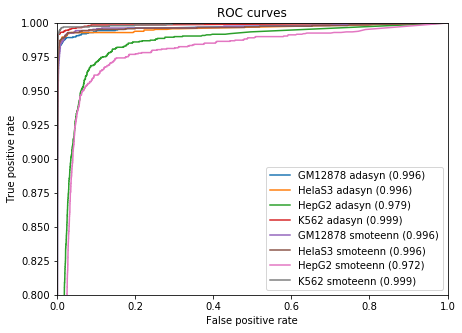

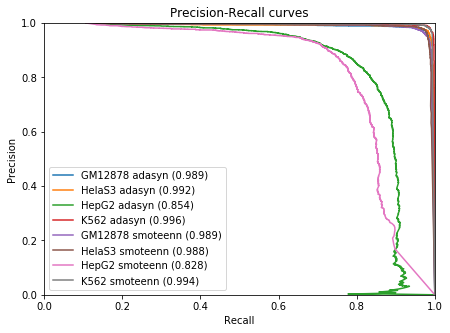

In [5]:
roc(results, 'AP-IP_2layers_150_roc.pdf')
pr(results, 'AP-IP_2layers_150_pr.pdf')

### Adasyn accuracy

In [6]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_adasyn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-P","I-P"])

print("Adasyn performance")
display(df)

Adasyn performance


Total       A-P       I-P
GM12878  0.992268  0.978555  0.994256
HelaS3   0.989807  0.985473  0.990391
HepG2    0.955831  0.905052  0.961892
K562     0.996609  0.986836  0.997822

### SMOTEENN accuracy

In [7]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_smoteenn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-P","I-P"])

print("Smoteenn performance")
display(df)

Smoteenn performance


Total       A-P       I-P
GM12878  0.989671  0.984615  0.990403
HelaS3   0.990475  0.987816  0.990834
HepG2    0.955970  0.873258  0.965844
K562     0.996017  0.991711  0.996552

## Benchmarks with the first MLP (4 layers (64, 128, 128, 64))

In [8]:
import matplotlib.pyplot as plt

history = [[] for i in range(4)]
y_pred_adasyn = [[] for i in range(4)]
y_pred_smoteenn = [[] for i in range(4)]
scores_adasyn = [[] for i in range(4)]
scores_smoteenn = [[] for i in range(4)]

inputs = [101, 74, 72, 135]
names = ["GM12878", "HelaS3", "HepG2", "K562"]

for i in range(4):
    model = dense2(inputs[i])
    history[i] = model.fit(X_train_adasyn[i], y_train_adasyn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_adasyn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_adasyn[i] = (total, one, zero)

for i in range(4):
    model = dense2(inputs[i])
    history[i] = model.fit(X_train_smoteenn[i], y_train_smoteenn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_smoteenn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_smoteenn[i] = (total, one, zero)
    
results_adasyn = [(names[i] + ' adasyn', y_test[i], y_pred_adasyn[i]) for i in range(4)]
results_smoteenn = [(names[i] + ' smoteenn', y_test[i], y_pred_smoteenn[i]) for i in range(4)]
results = results_adasyn + results_smoteenn

...building the mlp...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                6528      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)              

94737/94737 [==============================] - 3s 32us/step - loss: 0.0170 - acc: 0.9955 - auc_acc: 0.9966 - f1_acc: 0.9956 - precision_acc: 0.9927 - recall_acc: 0.9985 - val_loss: 0.0552 - val_acc: 0.9893 - val_auc_acc: 0.9967 - val_f1_acc: 0.9596 - val_precision_acc: 0.9410 - val_recall_acc: 0.9815
Epoch 49/150
94737/94737 [==============================] - 3s 30us/step - loss: 0.0175 - acc: 0.9956 - auc_acc: 0.9967 - f1_acc: 0.9956 - precision_acc: 0.9928 - recall_acc: 0.9985 - val_loss: 0.0558 - val_acc: 0.9903 - val_auc_acc: 0.9967 - val_f1_acc: 0.9635 - val_precision_acc: 0.9499 - val_recall_acc: 0.9798
Epoch 50/150
94737/94737 [==============================] - 3s 31us/step - loss: 0.0168 - acc: 0.9958 - auc_acc: 0.9968 - f1_acc: 0.9958 - precision_acc: 0.9930 - recall_acc: 0.9987 - val_loss: 0.0573 - val_acc: 0.9889 - val_auc_acc: 0.9968 - val_f1_acc: 0.9579 - val_precision_acc: 0.9372 - val_recall_acc: 0.9823
Epoch 51/150
94737/94737 [==============================] - 3s 31us/

94737/94737 [==============================] - 3s 32us/step - loss: 0.0106 - acc: 0.9974 - auc_acc: 0.9982 - f1_acc: 0.9974 - precision_acc: 0.9957 - recall_acc: 0.9991 - val_loss: 0.0572 - val_acc: 0.9911 - val_auc_acc: 0.9982 - val_f1_acc: 0.9659 - val_precision_acc: 0.9572 - val_recall_acc: 0.9767
Epoch 101/150
94737/94737 [==============================] - 3s 31us/step - loss: 0.0095 - acc: 0.9975 - auc_acc: 0.9982 - f1_acc: 0.9975 - precision_acc: 0.9958 - recall_acc: 0.9992 - val_loss: 0.0563 - val_acc: 0.9912 - val_auc_acc: 0.9982 - val_f1_acc: 0.9667 - val_precision_acc: 0.9577 - val_recall_acc: 0.9776
Epoch 102/150
94737/94737 [==============================] - 3s 31us/step - loss: 0.0095 - acc: 0.9976 - auc_acc: 0.9982 - f1_acc: 0.9976 - precision_acc: 0.9960 - recall_acc: 0.9992 - val_loss: 0.0571 - val_acc: 0.9912 - val_auc_acc: 0.9982 - val_f1_acc: 0.9670 - val_precision_acc: 0.9591 - val_recall_acc: 0.9769
Epoch 103/150
94737/94737 [==============================] - 3s 31

Epoch 126/150
94737/94737 [==============================] - 3s 34us/step - loss: 0.0073 - acc: 0.9982 - auc_acc: 0.9984 - f1_acc: 0.9982 - precision_acc: 0.9969 - recall_acc: 0.9995 - val_loss: 0.0583 - val_acc: 0.9919 - val_auc_acc: 0.9984 - val_f1_acc: 0.9693 - val_precision_acc: 0.9660 - val_recall_acc: 0.9743
Epoch 127/150
94737/94737 [==============================] - 3s 33us/step - loss: 0.0068 - acc: 0.9983 - auc_acc: 0.9985 - f1_acc: 0.9983 - precision_acc: 0.9972 - recall_acc: 0.9994 - val_loss: 0.0595 - val_acc: 0.9915 - val_auc_acc: 0.9985 - val_f1_acc: 0.9674 - val_precision_acc: 0.9609 - val_recall_acc: 0.9757
Epoch 128/150
94737/94737 [==============================] - 3s 33us/step - loss: 0.0073 - acc: 0.9981 - auc_acc: 0.9985 - f1_acc: 0.9980 - precision_acc: 0.9970 - recall_acc: 0.9992 - val_loss: 0.0594 - val_acc: 0.9915 - val_auc_acc: 0.9985 - val_f1_acc: 0.9679 - val_precision_acc: 0.9614 - val_recall_acc: 0.9763
Epoch 129/150
94737/94737 [=========================

Train on 100828 samples, validate on 14362 samples
Epoch 1/150
100828/100828 [==============================] - 4s 39us/step - loss: 0.3030 - acc: 0.8996 - auc_acc: 0.9239 - f1_acc: 0.9019 - precision_acc: 0.9131 - recall_acc: 0.8970 - val_loss: 0.1909 - val_acc: 0.9564 - val_auc_acc: 0.9462 - val_f1_acc: 0.8404 - val_precision_acc: 0.7345 - val_recall_acc: 0.9935
Epoch 2/150
100828/100828 [==============================] - 3s 32us/step - loss: 0.1985 - acc: 0.9337 - auc_acc: 0.9545 - f1_acc: 0.9313 - precision_acc: 0.9561 - recall_acc: 0.9088 - val_loss: 0.1426 - val_acc: 0.9660 - val_auc_acc: 0.9613 - val_f1_acc: 0.8725 - val_precision_acc: 0.7831 - val_recall_acc: 0.9954
Epoch 3/150
100828/100828 [==============================] - 3s 33us/step - loss: 0.1609 - acc: 0.9426 - auc_acc: 0.9663 - f1_acc: 0.9408 - precision_acc: 0.9605 - recall_acc: 0.9227 - val_loss: 0.1119 - val_acc: 0.9692 - val_auc_acc: 0.9703 - val_f1_acc: 0.8818 - val_precision_acc: 0.7976 - val_recall_acc: 0.9966
E

Epoch 27/150
100828/100828 [==============================] - 3s 32us/step - loss: 0.0431 - acc: 0.9875 - auc_acc: 0.9945 - f1_acc: 0.9874 - precision_acc: 0.9795 - recall_acc: 0.9956 - val_loss: 0.0607 - val_acc: 0.9818 - val_auc_acc: 0.9946 - val_f1_acc: 0.9264 - val_precision_acc: 0.8713 - val_recall_acc: 0.9946
Epoch 28/150
100828/100828 [==============================] - 3s 32us/step - loss: 0.0433 - acc: 0.9876 - auc_acc: 0.9947 - f1_acc: 0.9876 - precision_acc: 0.9798 - recall_acc: 0.9957 - val_loss: 0.0563 - val_acc: 0.9838 - val_auc_acc: 0.9947 - val_f1_acc: 0.9340 - val_precision_acc: 0.8844 - val_recall_acc: 0.9942
Epoch 29/150
100828/100828 [==============================] - 3s 31us/step - loss: 0.0421 - acc: 0.9882 - auc_acc: 0.9948 - f1_acc: 0.9882 - precision_acc: 0.9806 - recall_acc: 0.9960 - val_loss: 0.0530 - val_acc: 0.9836 - val_auc_acc: 0.9949 - val_f1_acc: 0.9327 - val_precision_acc: 0.8823 - val_recall_acc: 0.9940
Epoch 30/150
100828/100828 [=====================

Epoch 53/150
100828/100828 [==============================] - 2s 24us/step - loss: 0.0311 - acc: 0.9913 - auc_acc: 0.9965 - f1_acc: 0.9913 - precision_acc: 0.9854 - recall_acc: 0.9973 - val_loss: 0.0528 - val_acc: 0.9862 - val_auc_acc: 0.9965 - val_f1_acc: 0.9431 - val_precision_acc: 0.9008 - val_recall_acc: 0.9931
Epoch 54/150
100828/100828 [==============================] - 3s 28us/step - loss: 0.0307 - acc: 0.9915 - auc_acc: 0.9965 - f1_acc: 0.9914 - precision_acc: 0.9857 - recall_acc: 0.9973 - val_loss: 0.0455 - val_acc: 0.9874 - val_auc_acc: 0.9965 - val_f1_acc: 0.9470 - val_precision_acc: 0.9094 - val_recall_acc: 0.9915
Epoch 55/150
100828/100828 [==============================] - 3s 28us/step - loss: 0.0314 - acc: 0.9913 - auc_acc: 0.9966 - f1_acc: 0.9912 - precision_acc: 0.9856 - recall_acc: 0.9971 - val_loss: 0.0443 - val_acc: 0.9871 - val_auc_acc: 0.9966 - val_f1_acc: 0.9464 - val_precision_acc: 0.9078 - val_recall_acc: 0.9920
Epoch 56/150
100828/100828 [=====================

Epoch 79/150
100828/100828 [==============================] - 3s 29us/step - loss: 0.0271 - acc: 0.9927 - auc_acc: 0.9972 - f1_acc: 0.9927 - precision_acc: 0.9877 - recall_acc: 0.9979 - val_loss: 0.0401 - val_acc: 0.9873 - val_auc_acc: 0.9972 - val_f1_acc: 0.9468 - val_precision_acc: 0.9084 - val_recall_acc: 0.9926
Epoch 80/150
100828/100828 [==============================] - 3s 31us/step - loss: 0.0265 - acc: 0.9929 - auc_acc: 0.9972 - f1_acc: 0.9929 - precision_acc: 0.9880 - recall_acc: 0.9979 - val_loss: 0.0432 - val_acc: 0.9887 - val_auc_acc: 0.9973 - val_f1_acc: 0.9522 - val_precision_acc: 0.9175 - val_recall_acc: 0.9930
Epoch 81/150
100828/100828 [==============================] - 3s 31us/step - loss: 0.0257 - acc: 0.9928 - auc_acc: 0.9973 - f1_acc: 0.9928 - precision_acc: 0.9885 - recall_acc: 0.9972 - val_loss: 0.0446 - val_acc: 0.9873 - val_auc_acc: 0.9973 - val_f1_acc: 0.9483 - val_precision_acc: 0.9104 - val_recall_acc: 0.9933
Epoch 82/150
100828/100828 [=====================

Epoch 105/150
100828/100828 [==============================] - 3s 30us/step - loss: 0.0216 - acc: 0.9945 - auc_acc: 0.9976 - f1_acc: 0.9945 - precision_acc: 0.9907 - recall_acc: 0.9983 - val_loss: 0.0403 - val_acc: 0.9903 - val_auc_acc: 0.9976 - val_f1_acc: 0.9586 - val_precision_acc: 0.9314 - val_recall_acc: 0.9905
Epoch 106/150
100828/100828 [==============================] - 3s 30us/step - loss: 0.0220 - acc: 0.9939 - auc_acc: 0.9977 - f1_acc: 0.9938 - precision_acc: 0.9898 - recall_acc: 0.9979 - val_loss: 0.0429 - val_acc: 0.9900 - val_auc_acc: 0.9977 - val_f1_acc: 0.9587 - val_precision_acc: 0.9300 - val_recall_acc: 0.9921
Epoch 107/150
100828/100828 [==============================] - 3s 29us/step - loss: 0.0219 - acc: 0.9941 - auc_acc: 0.9977 - f1_acc: 0.9941 - precision_acc: 0.9901 - recall_acc: 0.9982 - val_loss: 0.0415 - val_acc: 0.9907 - val_auc_acc: 0.9977 - val_f1_acc: 0.9617 - val_precision_acc: 0.9366 - val_recall_acc: 0.9910
Epoch 108/150
100828/100828 [=================

Epoch 131/150
100828/100828 [==============================] - 3s 29us/step - loss: 0.0201 - acc: 0.9947 - auc_acc: 0.9979 - f1_acc: 0.9947 - precision_acc: 0.9909 - recall_acc: 0.9985 - val_loss: 0.0317 - val_acc: 0.9930 - val_auc_acc: 0.9979 - val_f1_acc: 0.9702 - val_precision_acc: 0.9576 - val_recall_acc: 0.9855
Epoch 132/150
100828/100828 [==============================] - 3s 28us/step - loss: 0.0219 - acc: 0.9941 - auc_acc: 0.9979 - f1_acc: 0.9941 - precision_acc: 0.9905 - recall_acc: 0.9978 - val_loss: 0.0338 - val_acc: 0.9919 - val_auc_acc: 0.9979 - val_f1_acc: 0.9658 - val_precision_acc: 0.9468 - val_recall_acc: 0.9882
Epoch 133/150
100828/100828 [==============================] - 3s 26us/step - loss: 0.0212 - acc: 0.9943 - auc_acc: 0.9979 - f1_acc: 0.9943 - precision_acc: 0.9905 - recall_acc: 0.9982 - val_loss: 0.0363 - val_acc: 0.9910 - val_auc_acc: 0.9979 - val_f1_acc: 0.9626 - val_precision_acc: 0.9391 - val_recall_acc: 0.9901
Epoch 134/150
100828/100828 [=================

Epoch 28/150
123226/123226 [==============================] - 4s 33us/step - loss: 0.1644 - acc: 0.9438 - auc_acc: 0.9711 - f1_acc: 0.9449 - precision_acc: 0.9214 - recall_acc: 0.9706 - val_loss: 0.1846 - val_acc: 0.9210 - val_auc_acc: 0.9712 - val_f1_acc: 0.7171 - val_precision_acc: 0.5756 - val_recall_acc: 0.9676
Epoch 29/150
123226/123226 [==============================] - 4s 32us/step - loss: 0.1619 - acc: 0.9448 - auc_acc: 0.9714 - f1_acc: 0.9459 - precision_acc: 0.9225 - recall_acc: 0.9713 - val_loss: 0.1721 - val_acc: 0.9275 - val_auc_acc: 0.9715 - val_f1_acc: 0.7327 - val_precision_acc: 0.5971 - val_recall_acc: 0.9623
Epoch 30/150
123226/123226 [==============================] - 4s 32us/step - loss: 0.1611 - acc: 0.9446 - auc_acc: 0.9717 - f1_acc: 0.9457 - precision_acc: 0.9227 - recall_acc: 0.9708 - val_loss: 0.1765 - val_acc: 0.9230 - val_auc_acc: 0.9718 - val_f1_acc: 0.7218 - val_precision_acc: 0.5816 - val_recall_acc: 0.9665
Epoch 31/150
123226/123226 [=====================

Epoch 54/150
123226/123226 [==============================] - 4s 32us/step - loss: 0.1335 - acc: 0.9544 - auc_acc: 0.9765 - f1_acc: 0.9553 - precision_acc: 0.9324 - recall_acc: 0.9801 - val_loss: 0.1613 - val_acc: 0.9338 - val_auc_acc: 0.9766 - val_f1_acc: 0.7489 - val_precision_acc: 0.6213 - val_recall_acc: 0.9554
Epoch 55/150
123226/123226 [==============================] - 4s 32us/step - loss: 0.1336 - acc: 0.9547 - auc_acc: 0.9767 - f1_acc: 0.9556 - precision_acc: 0.9324 - recall_acc: 0.9807 - val_loss: 0.1545 - val_acc: 0.9375 - val_auc_acc: 0.9768 - val_f1_acc: 0.7584 - val_precision_acc: 0.6383 - val_recall_acc: 0.9472
Epoch 56/150
123226/123226 [==============================] - 4s 30us/step - loss: 0.1325 - acc: 0.9548 - auc_acc: 0.9768 - f1_acc: 0.9555 - precision_acc: 0.9327 - recall_acc: 0.9802 - val_loss: 0.1588 - val_acc: 0.9346 - val_auc_acc: 0.9769 - val_f1_acc: 0.7512 - val_precision_acc: 0.6257 - val_recall_acc: 0.9532
Epoch 57/150
123226/123226 [=====================

Epoch 80/150
123226/123226 [==============================] - 4s 34us/step - loss: 0.1160 - acc: 0.9617 - auc_acc: 0.9796 - f1_acc: 0.9623 - precision_acc: 0.9412 - recall_acc: 0.9851 - val_loss: 0.1511 - val_acc: 0.9412 - val_auc_acc: 0.9796 - val_f1_acc: 0.7700 - val_precision_acc: 0.6552 - val_recall_acc: 0.9471
Epoch 81/150
123226/123226 [==============================] - 4s 32us/step - loss: 0.1159 - acc: 0.9620 - auc_acc: 0.9797 - f1_acc: 0.9625 - precision_acc: 0.9411 - recall_acc: 0.9856 - val_loss: 0.1637 - val_acc: 0.9371 - val_auc_acc: 0.9797 - val_f1_acc: 0.7587 - val_precision_acc: 0.6369 - val_recall_acc: 0.9529
Epoch 82/150
123226/123226 [==============================] - 4s 32us/step - loss: 0.1153 - acc: 0.9622 - auc_acc: 0.9797 - f1_acc: 0.9628 - precision_acc: 0.9412 - recall_acc: 0.9862 - val_loss: 0.1403 - val_acc: 0.9460 - val_auc_acc: 0.9798 - val_f1_acc: 0.7817 - val_precision_acc: 0.6808 - val_recall_acc: 0.9312
Epoch 83/150
123226/123226 [=====================

Epoch 106/150
123226/123226 [==============================] - 3s 26us/step - loss: 0.1054 - acc: 0.9658 - auc_acc: 0.9816 - f1_acc: 0.9664 - precision_acc: 0.9468 - recall_acc: 0.9873 - val_loss: 0.1448 - val_acc: 0.9465 - val_auc_acc: 0.9817 - val_f1_acc: 0.7852 - val_precision_acc: 0.6802 - val_recall_acc: 0.9427
Epoch 107/150
123226/123226 [==============================] - 3s 25us/step - loss: 0.1051 - acc: 0.9663 - auc_acc: 0.9817 - f1_acc: 0.9668 - precision_acc: 0.9473 - recall_acc: 0.9877 - val_loss: 0.1346 - val_acc: 0.9537 - val_auc_acc: 0.9817 - val_f1_acc: 0.8017 - val_precision_acc: 0.7251 - val_recall_acc: 0.9091
Epoch 108/150
123226/123226 [==============================] - 3s 24us/step - loss: 0.1052 - acc: 0.9658 - auc_acc: 0.9818 - f1_acc: 0.9664 - precision_acc: 0.9466 - recall_acc: 0.9875 - val_loss: 0.1592 - val_acc: 0.9420 - val_auc_acc: 0.9818 - val_f1_acc: 0.7733 - val_precision_acc: 0.6586 - val_recall_acc: 0.9507
Epoch 109/150
123226/123226 [=================

Epoch 132/150
123226/123226 [==============================] - 3s 26us/step - loss: 0.0986 - acc: 0.9684 - auc_acc: 0.9832 - f1_acc: 0.9689 - precision_acc: 0.9502 - recall_acc: 0.9888 - val_loss: 0.1437 - val_acc: 0.9496 - val_auc_acc: 0.9832 - val_f1_acc: 0.7950 - val_precision_acc: 0.6987 - val_recall_acc: 0.9359
Epoch 133/150
123226/123226 [==============================] - 3s 26us/step - loss: 0.0970 - acc: 0.9693 - auc_acc: 0.9832 - f1_acc: 0.9698 - precision_acc: 0.9519 - recall_acc: 0.9888 - val_loss: 0.1546 - val_acc: 0.9468 - val_auc_acc: 0.9832 - val_f1_acc: 0.7862 - val_precision_acc: 0.6821 - val_recall_acc: 0.9420
Epoch 134/150
123226/123226 [==============================] - 3s 26us/step - loss: 0.0979 - acc: 0.9687 - auc_acc: 0.9833 - f1_acc: 0.9691 - precision_acc: 0.9511 - recall_acc: 0.9884 - val_loss: 0.1409 - val_acc: 0.9533 - val_auc_acc: 0.9833 - val_f1_acc: 0.8021 - val_precision_acc: 0.7222 - val_recall_acc: 0.9147
Epoch 135/150
123226/123226 [=================

Epoch 29/150
106248/106248 [==============================] - 3s 33us/step - loss: 0.0126 - acc: 0.9975 - auc_acc: 0.9982 - f1_acc: 0.9975 - precision_acc: 0.9959 - recall_acc: 0.9991 - val_loss: 0.0199 - val_acc: 0.9959 - val_auc_acc: 0.9982 - val_f1_acc: 0.9818 - val_precision_acc: 0.9710 - val_recall_acc: 0.9942
Epoch 30/150
106248/106248 [==============================] - 4s 33us/step - loss: 0.0132 - acc: 0.9971 - auc_acc: 0.9982 - f1_acc: 0.9971 - precision_acc: 0.9951 - recall_acc: 0.9991 - val_loss: 0.0194 - val_acc: 0.9960 - val_auc_acc: 0.9983 - val_f1_acc: 0.9822 - val_precision_acc: 0.9723 - val_recall_acc: 0.9939
Epoch 31/150
106248/106248 [==============================] - 3s 33us/step - loss: 0.0123 - acc: 0.9972 - auc_acc: 0.9983 - f1_acc: 0.9972 - precision_acc: 0.9955 - recall_acc: 0.9989 - val_loss: 0.0201 - val_acc: 0.9960 - val_auc_acc: 0.9983 - val_f1_acc: 0.9816 - val_precision_acc: 0.9705 - val_recall_acc: 0.9946
Epoch 32/150
106248/106248 [=====================

Epoch 55/150
106248/106248 [==============================] - 3s 33us/step - loss: 0.0071 - acc: 0.9984 - auc_acc: 0.9989 - f1_acc: 0.9984 - precision_acc: 0.9972 - recall_acc: 0.9995 - val_loss: 0.0187 - val_acc: 0.9966 - val_auc_acc: 0.9989 - val_f1_acc: 0.9851 - val_precision_acc: 0.9765 - val_recall_acc: 0.9953
Epoch 56/150
106248/106248 [==============================] - 3s 29us/step - loss: 0.0077 - acc: 0.9984 - auc_acc: 0.9989 - f1_acc: 0.9984 - precision_acc: 0.9972 - recall_acc: 0.9995 - val_loss: 0.0214 - val_acc: 0.9958 - val_auc_acc: 0.9989 - val_f1_acc: 0.9814 - val_precision_acc: 0.9711 - val_recall_acc: 0.9934
Epoch 57/150
106248/106248 [==============================] - 4s 34us/step - loss: 0.0084 - acc: 0.9981 - auc_acc: 0.9989 - f1_acc: 0.9981 - precision_acc: 0.9969 - recall_acc: 0.9994 - val_loss: 0.0201 - val_acc: 0.9964 - val_auc_acc: 0.9989 - val_f1_acc: 0.9842 - val_precision_acc: 0.9759 - val_recall_acc: 0.9941
Epoch 58/150
106248/106248 [=====================

Epoch 81/150
106248/106248 [==============================] - 4s 33us/step - loss: 0.0055 - acc: 0.9987 - auc_acc: 0.9992 - f1_acc: 0.9987 - precision_acc: 0.9979 - recall_acc: 0.9995 - val_loss: 0.0200 - val_acc: 0.9966 - val_auc_acc: 0.9992 - val_f1_acc: 0.9849 - val_precision_acc: 0.9813 - val_recall_acc: 0.9897
Epoch 82/150
106248/106248 [==============================] - 3s 32us/step - loss: 0.0049 - acc: 0.9988 - auc_acc: 0.9992 - f1_acc: 0.9988 - precision_acc: 0.9980 - recall_acc: 0.9997 - val_loss: 0.0198 - val_acc: 0.9965 - val_auc_acc: 0.9992 - val_f1_acc: 0.9843 - val_precision_acc: 0.9789 - val_recall_acc: 0.9912
Epoch 83/150
106248/106248 [==============================] - 3s 32us/step - loss: 0.0051 - acc: 0.9989 - auc_acc: 0.9992 - f1_acc: 0.9988 - precision_acc: 0.9980 - recall_acc: 0.9997 - val_loss: 0.0189 - val_acc: 0.9970 - val_auc_acc: 0.9992 - val_f1_acc: 0.9866 - val_precision_acc: 0.9806 - val_recall_acc: 0.9938
Epoch 84/150
106248/106248 [=====================

Epoch 107/150
106248/106248 [==============================] - 3s 32us/step - loss: 0.0040 - acc: 0.9991 - auc_acc: 0.9993 - f1_acc: 0.9991 - precision_acc: 0.9985 - recall_acc: 0.9997 - val_loss: 0.0198 - val_acc: 0.9967 - val_auc_acc: 0.9993 - val_f1_acc: 0.9850 - val_precision_acc: 0.9811 - val_recall_acc: 0.9901
Epoch 108/150
106248/106248 [==============================] - 3s 32us/step - loss: 0.0053 - acc: 0.9988 - auc_acc: 0.9993 - f1_acc: 0.9988 - precision_acc: 0.9980 - recall_acc: 0.9997 - val_loss: 0.0186 - val_acc: 0.9968 - val_auc_acc: 0.9993 - val_f1_acc: 0.9854 - val_precision_acc: 0.9796 - val_recall_acc: 0.9925
Epoch 109/150
106248/106248 [==============================] - 3s 32us/step - loss: 0.0041 - acc: 0.9990 - auc_acc: 0.9993 - f1_acc: 0.9990 - precision_acc: 0.9984 - recall_acc: 0.9996 - val_loss: 0.0182 - val_acc: 0.9970 - val_auc_acc: 0.9993 - val_f1_acc: 0.9868 - val_precision_acc: 0.9809 - val_recall_acc: 0.9938
Epoch 110/150
106248/106248 [=================

Epoch 133/150
106248/106248 [==============================] - 3s 31us/step - loss: 0.0042 - acc: 0.9990 - auc_acc: 0.9994 - f1_acc: 0.9990 - precision_acc: 0.9983 - recall_acc: 0.9997 - val_loss: 0.0211 - val_acc: 0.9967 - val_auc_acc: 0.9994 - val_f1_acc: 0.9846 - val_precision_acc: 0.9807 - val_recall_acc: 0.9898
Epoch 134/150
106248/106248 [==============================] - 3s 32us/step - loss: 0.0039 - acc: 0.9990 - auc_acc: 0.9994 - f1_acc: 0.9990 - precision_acc: 0.9985 - recall_acc: 0.9996 - val_loss: 0.0218 - val_acc: 0.9964 - val_auc_acc: 0.9994 - val_f1_acc: 0.9840 - val_precision_acc: 0.9777 - val_recall_acc: 0.9916
Epoch 135/150
106248/106248 [==============================] - 3s 31us/step - loss: 0.0034 - acc: 0.9991 - auc_acc: 0.9994 - f1_acc: 0.9991 - precision_acc: 0.9985 - recall_acc: 0.9997 - val_loss: 0.0195 - val_acc: 0.9969 - val_auc_acc: 0.9994 - val_f1_acc: 0.9860 - val_precision_acc: 0.9830 - val_recall_acc: 0.9901
Epoch 136/150
106248/106248 [=================

92691/92691 [==============================] - 3s 32us/step - loss: 0.0213 - acc: 0.9931 - auc_acc: 0.9981 - f1_acc: 0.9931 - precision_acc: 0.9959 - recall_acc: 0.9905 - val_loss: 0.0539 - val_acc: 0.9872 - val_auc_acc: 0.9981 - val_f1_acc: 0.9512 - val_precision_acc: 0.9229 - val_recall_acc: 0.9839
Epoch 31/150
92691/92691 [==============================] - 3s 31us/step - loss: 0.0211 - acc: 0.9934 - auc_acc: 0.9981 - f1_acc: 0.9935 - precision_acc: 0.9964 - recall_acc: 0.9907 - val_loss: 0.0557 - val_acc: 0.9863 - val_auc_acc: 0.9981 - val_f1_acc: 0.9484 - val_precision_acc: 0.9171 - val_recall_acc: 0.9845
Epoch 32/150
92691/92691 [==============================] - 3s 32us/step - loss: 0.0209 - acc: 0.9932 - auc_acc: 0.9981 - f1_acc: 0.9933 - precision_acc: 0.9959 - recall_acc: 0.9909 - val_loss: 0.0531 - val_acc: 0.9874 - val_auc_acc: 0.9981 - val_f1_acc: 0.9521 - val_precision_acc: 0.9246 - val_recall_acc: 0.9839
Epoch 33/150
92691/92691 [==============================] - 3s 34us/

92691/92691 [==============================] - 3s 33us/step - loss: 0.0111 - acc: 0.9962 - auc_acc: 0.9988 - f1_acc: 0.9962 - precision_acc: 0.9976 - recall_acc: 0.9949 - val_loss: 0.0626 - val_acc: 0.9872 - val_auc_acc: 0.9988 - val_f1_acc: 0.9516 - val_precision_acc: 0.9221 - val_recall_acc: 0.9854
Epoch 83/150
92691/92691 [==============================] - 3s 32us/step - loss: 0.0116 - acc: 0.9961 - auc_acc: 0.9988 - f1_acc: 0.9962 - precision_acc: 0.9972 - recall_acc: 0.9952 - val_loss: 0.0634 - val_acc: 0.9869 - val_auc_acc: 0.9988 - val_f1_acc: 0.9501 - val_precision_acc: 0.9208 - val_recall_acc: 0.9842
Epoch 84/150
92691/92691 [==============================] - 3s 34us/step - loss: 0.0113 - acc: 0.9960 - auc_acc: 0.9988 - f1_acc: 0.9961 - precision_acc: 0.9970 - recall_acc: 0.9952 - val_loss: 0.0587 - val_acc: 0.9882 - val_auc_acc: 0.9988 - val_f1_acc: 0.9557 - val_precision_acc: 0.9324 - val_recall_acc: 0.9825
Epoch 85/150
92691/92691 [==============================] - 3s 32us/

92691/92691 [==============================] - 3s 31us/step - loss: 0.0082 - acc: 0.9971 - auc_acc: 0.9990 - f1_acc: 0.9971 - precision_acc: 0.9977 - recall_acc: 0.9966 - val_loss: 0.0621 - val_acc: 0.9878 - val_auc_acc: 0.9990 - val_f1_acc: 0.9538 - val_precision_acc: 0.9275 - val_recall_acc: 0.9840
Epoch 109/150
92691/92691 [==============================] - 3s 33us/step - loss: 0.0073 - acc: 0.9975 - auc_acc: 0.9990 - f1_acc: 0.9975 - precision_acc: 0.9980 - recall_acc: 0.9971 - val_loss: 0.0647 - val_acc: 0.9875 - val_auc_acc: 0.9990 - val_f1_acc: 0.9526 - val_precision_acc: 0.9243 - val_recall_acc: 0.9849
Epoch 110/150
92691/92691 [==============================] - 3s 33us/step - loss: 0.0078 - acc: 0.9974 - auc_acc: 0.9990 - f1_acc: 0.9974 - precision_acc: 0.9978 - recall_acc: 0.9970 - val_loss: 0.0646 - val_acc: 0.9876 - val_auc_acc: 0.9990 - val_f1_acc: 0.9531 - val_precision_acc: 0.9248 - val_recall_acc: 0.9854
Epoch 111/150
92691/92691 [==============================] - 3s 33

Epoch 134/150
92691/92691 [==============================] - 3s 33us/step - loss: 0.0056 - acc: 0.9979 - auc_acc: 0.9991 - f1_acc: 0.9980 - precision_acc: 0.9982 - recall_acc: 0.9978 - val_loss: 0.0689 - val_acc: 0.9872 - val_auc_acc: 0.9991 - val_f1_acc: 0.9513 - val_precision_acc: 0.9250 - val_recall_acc: 0.9814
Epoch 135/150
92691/92691 [==============================] - 3s 33us/step - loss: 0.0054 - acc: 0.9980 - auc_acc: 0.9991 - f1_acc: 0.9981 - precision_acc: 0.9982 - recall_acc: 0.9980 - val_loss: 0.0716 - val_acc: 0.9871 - val_auc_acc: 0.9991 - val_f1_acc: 0.9503 - val_precision_acc: 0.9223 - val_recall_acc: 0.9827
Epoch 136/150
92691/92691 [==============================] - 3s 33us/step - loss: 0.0051 - acc: 0.9982 - auc_acc: 0.9991 - f1_acc: 0.9982 - precision_acc: 0.9985 - recall_acc: 0.9980 - val_loss: 0.0691 - val_acc: 0.9875 - val_auc_acc: 0.9991 - val_f1_acc: 0.9524 - val_precision_acc: 0.9267 - val_recall_acc: 0.9822
Epoch 137/150
92691/92691 [=========================

99695/99695 [==============================] - 3s 33us/step - loss: 0.0194 - acc: 0.9943 - auc_acc: 0.9983 - f1_acc: 0.9943 - precision_acc: 0.9966 - recall_acc: 0.9920 - val_loss: 0.0396 - val_acc: 0.9918 - val_auc_acc: 0.9983 - val_f1_acc: 0.9656 - val_precision_acc: 0.9462 - val_recall_acc: 0.9887
Epoch 32/150
99695/99695 [==============================] - 3s 31us/step - loss: 0.0192 - acc: 0.9943 - auc_acc: 0.9983 - f1_acc: 0.9943 - precision_acc: 0.9965 - recall_acc: 0.9921 - val_loss: 0.0478 - val_acc: 0.9900 - val_auc_acc: 0.9983 - val_f1_acc: 0.9588 - val_precision_acc: 0.9313 - val_recall_acc: 0.9909
Epoch 33/150
99695/99695 [==============================] - 3s 31us/step - loss: 0.0217 - acc: 0.9936 - auc_acc: 0.9984 - f1_acc: 0.9937 - precision_acc: 0.9954 - recall_acc: 0.9920 - val_loss: 0.0479 - val_acc: 0.9891 - val_auc_acc: 0.9984 - val_f1_acc: 0.9550 - val_precision_acc: 0.9253 - val_recall_acc: 0.9904
Epoch 34/150
99695/99695 [==============================] - 3s 31us/

99695/99695 [==============================] - 3s 31us/step - loss: 0.0113 - acc: 0.9962 - auc_acc: 0.9990 - f1_acc: 0.9963 - precision_acc: 0.9975 - recall_acc: 0.9951 - val_loss: 0.0433 - val_acc: 0.9918 - val_auc_acc: 0.9990 - val_f1_acc: 0.9657 - val_precision_acc: 0.9438 - val_recall_acc: 0.9912
Epoch 84/150
99695/99695 [==============================] - 3s 31us/step - loss: 0.0118 - acc: 0.9961 - auc_acc: 0.9990 - f1_acc: 0.9961 - precision_acc: 0.9974 - recall_acc: 0.9948 - val_loss: 0.0450 - val_acc: 0.9914 - val_auc_acc: 0.9990 - val_f1_acc: 0.9642 - val_precision_acc: 0.9411 - val_recall_acc: 0.9912
Epoch 85/150
99695/99695 [==============================] - 3s 30us/step - loss: 0.0119 - acc: 0.9959 - auc_acc: 0.9990 - f1_acc: 0.9959 - precision_acc: 0.9974 - recall_acc: 0.9945 - val_loss: 0.0388 - val_acc: 0.9922 - val_auc_acc: 0.9990 - val_f1_acc: 0.9675 - val_precision_acc: 0.9476 - val_recall_acc: 0.9906
Epoch 86/150
99695/99695 [==============================] - 3s 31us/

99695/99695 [==============================] - 3s 31us/step - loss: 0.0101 - acc: 0.9965 - auc_acc: 0.9991 - f1_acc: 0.9965 - precision_acc: 0.9975 - recall_acc: 0.9956 - val_loss: 0.0429 - val_acc: 0.9915 - val_auc_acc: 0.9991 - val_f1_acc: 0.9644 - val_precision_acc: 0.9428 - val_recall_acc: 0.9897
Epoch 110/150
99695/99695 [==============================] - 3s 32us/step - loss: 0.0105 - acc: 0.9966 - auc_acc: 0.9991 - f1_acc: 0.9966 - precision_acc: 0.9973 - recall_acc: 0.9961 - val_loss: 0.0422 - val_acc: 0.9909 - val_auc_acc: 0.9991 - val_f1_acc: 0.9620 - val_precision_acc: 0.9379 - val_recall_acc: 0.9904
Epoch 111/150
99695/99695 [==============================] - 3s 32us/step - loss: 0.0099 - acc: 0.9967 - auc_acc: 0.9991 - f1_acc: 0.9967 - precision_acc: 0.9972 - recall_acc: 0.9963 - val_loss: 0.0420 - val_acc: 0.9916 - val_auc_acc: 0.9991 - val_f1_acc: 0.9647 - val_precision_acc: 0.9423 - val_recall_acc: 0.9908
Epoch 112/150
99695/99695 [==============================] - 3s 30

Epoch 135/150
99695/99695 [==============================] - 3s 31us/step - loss: 0.0084 - acc: 0.9968 - auc_acc: 0.9992 - f1_acc: 0.9968 - precision_acc: 0.9974 - recall_acc: 0.9962 - val_loss: 0.0451 - val_acc: 0.9919 - val_auc_acc: 0.9992 - val_f1_acc: 0.9662 - val_precision_acc: 0.9453 - val_recall_acc: 0.9904
Epoch 136/150
99695/99695 [==============================] - 3s 31us/step - loss: 0.0084 - acc: 0.9970 - auc_acc: 0.9992 - f1_acc: 0.9970 - precision_acc: 0.9975 - recall_acc: 0.9966 - val_loss: 0.0429 - val_acc: 0.9921 - val_auc_acc: 0.9992 - val_f1_acc: 0.9672 - val_precision_acc: 0.9467 - val_recall_acc: 0.9909
Epoch 137/150
99695/99695 [==============================] - 3s 31us/step - loss: 0.0080 - acc: 0.9969 - auc_acc: 0.9992 - f1_acc: 0.9969 - precision_acc: 0.9976 - recall_acc: 0.9963 - val_loss: 0.0431 - val_acc: 0.9921 - val_auc_acc: 0.9992 - val_f1_acc: 0.9668 - val_precision_acc: 0.9472 - val_recall_acc: 0.9897
Epoch 138/150
99695/99695 [=========================

Epoch 32/150
116997/116997 [==============================] - 4s 32us/step - loss: 0.0514 - acc: 0.9825 - auc_acc: 0.9926 - f1_acc: 0.9832 - precision_acc: 0.9823 - recall_acc: 0.9845 - val_loss: 0.2060 - val_acc: 0.9385 - val_auc_acc: 0.9926 - val_f1_acc: 0.7599 - val_precision_acc: 0.6456 - val_recall_acc: 0.9365
Epoch 33/150
116997/116997 [==============================] - 4s 32us/step - loss: 0.0521 - acc: 0.9824 - auc_acc: 0.9927 - f1_acc: 0.9831 - precision_acc: 0.9818 - recall_acc: 0.9846 - val_loss: 0.2068 - val_acc: 0.9433 - val_auc_acc: 0.9927 - val_f1_acc: 0.7746 - val_precision_acc: 0.6653 - val_recall_acc: 0.9407
Epoch 34/150
116997/116997 [==============================] - 4s 31us/step - loss: 0.0502 - acc: 0.9829 - auc_acc: 0.9928 - f1_acc: 0.9836 - precision_acc: 0.9827 - recall_acc: 0.9847 - val_loss: 0.2611 - val_acc: 0.9361 - val_auc_acc: 0.9928 - val_f1_acc: 0.7564 - val_precision_acc: 0.6326 - val_recall_acc: 0.9533
Epoch 35/150
116997/116997 [=====================

Epoch 58/150
116997/116997 [==============================] - 4s 32us/step - loss: 0.0413 - acc: 0.9856 - auc_acc: 0.9937 - f1_acc: 0.9862 - precision_acc: 0.9846 - recall_acc: 0.9880 - val_loss: 0.2993 - val_acc: 0.9293 - val_auc_acc: 0.9937 - val_f1_acc: 0.7397 - val_precision_acc: 0.6051 - val_recall_acc: 0.9668
Epoch 59/150
116997/116997 [==============================] - 4s 31us/step - loss: 0.0402 - acc: 0.9865 - auc_acc: 0.9937 - f1_acc: 0.9870 - precision_acc: 0.9857 - recall_acc: 0.9885 - val_loss: 0.3113 - val_acc: 0.9273 - val_auc_acc: 0.9937 - val_f1_acc: 0.7339 - val_precision_acc: 0.5976 - val_recall_acc: 0.9671
Epoch 60/150
116997/116997 [==============================] - 4s 32us/step - loss: 0.0403 - acc: 0.9862 - auc_acc: 0.9937 - f1_acc: 0.9868 - precision_acc: 0.9853 - recall_acc: 0.9885 - val_loss: 0.2910 - val_acc: 0.9327 - val_auc_acc: 0.9937 - val_f1_acc: 0.7484 - val_precision_acc: 0.6182 - val_recall_acc: 0.9630
Epoch 61/150
116997/116997 [=====================

Epoch 84/150
116997/116997 [==============================] - 4s 33us/step - loss: 0.0348 - acc: 0.9879 - auc_acc: 0.9943 - f1_acc: 0.9884 - precision_acc: 0.9864 - recall_acc: 0.9906 - val_loss: 0.2556 - val_acc: 0.9392 - val_auc_acc: 0.9943 - val_f1_acc: 0.7642 - val_precision_acc: 0.6449 - val_recall_acc: 0.9503
Epoch 85/150
116997/116997 [==============================] - 4s 33us/step - loss: 0.0336 - acc: 0.9885 - auc_acc: 0.9943 - f1_acc: 0.9889 - precision_acc: 0.9871 - recall_acc: 0.9909 - val_loss: 0.2823 - val_acc: 0.9340 - val_auc_acc: 0.9943 - val_f1_acc: 0.7513 - val_precision_acc: 0.6235 - val_recall_acc: 0.9604
Epoch 86/150
116997/116997 [==============================] - 4s 32us/step - loss: 0.0333 - acc: 0.9886 - auc_acc: 0.9943 - f1_acc: 0.9890 - precision_acc: 0.9870 - recall_acc: 0.9912 - val_loss: 0.2794 - val_acc: 0.9338 - val_auc_acc: 0.9943 - val_f1_acc: 0.7509 - val_precision_acc: 0.6223 - val_recall_acc: 0.9612
Epoch 87/150
116997/116997 [=====================

Epoch 110/150
116997/116997 [==============================] - 4s 31us/step - loss: 0.0288 - acc: 0.9901 - auc_acc: 0.9947 - f1_acc: 0.9905 - precision_acc: 0.9887 - recall_acc: 0.9925 - val_loss: 0.2786 - val_acc: 0.9389 - val_auc_acc: 0.9947 - val_f1_acc: 0.7650 - val_precision_acc: 0.6427 - val_recall_acc: 0.9583
Epoch 111/150
116997/116997 [==============================] - 4s 31us/step - loss: 0.0288 - acc: 0.9900 - auc_acc: 0.9947 - f1_acc: 0.9904 - precision_acc: 0.9887 - recall_acc: 0.9922 - val_loss: 0.2802 - val_acc: 0.9368 - val_auc_acc: 0.9947 - val_f1_acc: 0.7587 - val_precision_acc: 0.6347 - val_recall_acc: 0.9572
Epoch 112/150
116997/116997 [==============================] - 4s 33us/step - loss: 0.0289 - acc: 0.9902 - auc_acc: 0.9947 - f1_acc: 0.9906 - precision_acc: 0.9885 - recall_acc: 0.9928 - val_loss: 0.2769 - val_acc: 0.9387 - val_auc_acc: 0.9947 - val_f1_acc: 0.7647 - val_precision_acc: 0.6417 - val_recall_acc: 0.9593
Epoch 113/150
116997/116997 [=================

Epoch 136/150
116997/116997 [==============================] - 4s 31us/step - loss: 0.0247 - acc: 0.9914 - auc_acc: 0.9949 - f1_acc: 0.9917 - precision_acc: 0.9902 - recall_acc: 0.9934 - val_loss: 0.2914 - val_acc: 0.9409 - val_auc_acc: 0.9950 - val_f1_acc: 0.7695 - val_precision_acc: 0.6530 - val_recall_acc: 0.9507
Epoch 137/150
116997/116997 [==============================] - 4s 31us/step - loss: 0.0247 - acc: 0.9917 - auc_acc: 0.9950 - f1_acc: 0.9921 - precision_acc: 0.9902 - recall_acc: 0.9941 - val_loss: 0.2608 - val_acc: 0.9432 - val_auc_acc: 0.9950 - val_f1_acc: 0.7745 - val_precision_acc: 0.6622 - val_recall_acc: 0.9467
Epoch 138/150
116997/116997 [==============================] - 3s 30us/step - loss: 0.0255 - acc: 0.9912 - auc_acc: 0.9950 - f1_acc: 0.9916 - precision_acc: 0.9895 - recall_acc: 0.9938 - val_loss: 0.2957 - val_acc: 0.9386 - val_auc_acc: 0.9950 - val_f1_acc: 0.7636 - val_precision_acc: 0.6426 - val_recall_acc: 0.9552
Epoch 139/150
116997/116997 [=================

Epoch 33/150
105009/105009 [==============================] - 3s 32us/step - loss: 0.0111 - acc: 0.9971 - auc_acc: 0.9989 - f1_acc: 0.9970 - precision_acc: 0.9985 - recall_acc: 0.9956 - val_loss: 0.0333 - val_acc: 0.9942 - val_auc_acc: 0.9989 - val_f1_acc: 0.9743 - val_precision_acc: 0.9555 - val_recall_acc: 0.9955
Epoch 34/150
105009/105009 [==============================] - 3s 33us/step - loss: 0.0110 - acc: 0.9971 - auc_acc: 0.9990 - f1_acc: 0.9971 - precision_acc: 0.9985 - recall_acc: 0.9957 - val_loss: 0.0299 - val_acc: 0.9947 - val_auc_acc: 0.9990 - val_f1_acc: 0.9763 - val_precision_acc: 0.9593 - val_recall_acc: 0.9955
Epoch 35/150
105009/105009 [==============================] - 3s 27us/step - loss: 0.0104 - acc: 0.9972 - auc_acc: 0.9990 - f1_acc: 0.9972 - precision_acc: 0.9987 - recall_acc: 0.9958 - val_loss: 0.0266 - val_acc: 0.9956 - val_auc_acc: 0.9990 - val_f1_acc: 0.9801 - val_precision_acc: 0.9669 - val_recall_acc: 0.9950
Epoch 36/150
105009/105009 [=====================

Epoch 59/150
105009/105009 [==============================] - 3s 31us/step - loss: 0.0071 - acc: 0.9977 - auc_acc: 0.9993 - f1_acc: 0.9977 - precision_acc: 0.9991 - recall_acc: 0.9964 - val_loss: 0.0267 - val_acc: 0.9961 - val_auc_acc: 0.9993 - val_f1_acc: 0.9825 - val_precision_acc: 0.9708 - val_recall_acc: 0.9955
Epoch 60/150
105009/105009 [==============================] - 3s 30us/step - loss: 0.0067 - acc: 0.9976 - auc_acc: 0.9993 - f1_acc: 0.9976 - precision_acc: 0.9990 - recall_acc: 0.9964 - val_loss: 0.0287 - val_acc: 0.9960 - val_auc_acc: 0.9993 - val_f1_acc: 0.9820 - val_precision_acc: 0.9700 - val_recall_acc: 0.9955
Epoch 61/150
105009/105009 [==============================] - 3s 29us/step - loss: 0.0068 - acc: 0.9976 - auc_acc: 0.9993 - f1_acc: 0.9976 - precision_acc: 0.9989 - recall_acc: 0.9964 - val_loss: 0.0289 - val_acc: 0.9958 - val_auc_acc: 0.9993 - val_f1_acc: 0.9812 - val_precision_acc: 0.9694 - val_recall_acc: 0.9945
Epoch 62/150
105009/105009 [=====================

Epoch 85/150
105009/105009 [==============================] - 3s 32us/step - loss: 0.0041 - acc: 0.9984 - auc_acc: 0.9994 - f1_acc: 0.9984 - precision_acc: 0.9993 - recall_acc: 0.9976 - val_loss: 0.0300 - val_acc: 0.9959 - val_auc_acc: 0.9994 - val_f1_acc: 0.9816 - val_precision_acc: 0.9699 - val_recall_acc: 0.9949
Epoch 86/150
105009/105009 [==============================] - 3s 30us/step - loss: 0.0040 - acc: 0.9984 - auc_acc: 0.9994 - f1_acc: 0.9984 - precision_acc: 0.9992 - recall_acc: 0.9977 - val_loss: 0.0304 - val_acc: 0.9958 - val_auc_acc: 0.9994 - val_f1_acc: 0.9813 - val_precision_acc: 0.9694 - val_recall_acc: 0.9949
Epoch 87/150
105009/105009 [==============================] - 3s 30us/step - loss: 0.0038 - acc: 0.9986 - auc_acc: 0.9994 - f1_acc: 0.9986 - precision_acc: 0.9993 - recall_acc: 0.9979 - val_loss: 0.0301 - val_acc: 0.9959 - val_auc_acc: 0.9994 - val_f1_acc: 0.9817 - val_precision_acc: 0.9702 - val_recall_acc: 0.9949
Epoch 88/150
105009/105009 [=====================

Epoch 111/150
105009/105009 [==============================] - 3s 30us/step - loss: 0.0024 - acc: 0.9992 - auc_acc: 0.9995 - f1_acc: 0.9992 - precision_acc: 0.9994 - recall_acc: 0.9990 - val_loss: 0.0321 - val_acc: 0.9959 - val_auc_acc: 0.9995 - val_f1_acc: 0.9817 - val_precision_acc: 0.9700 - val_recall_acc: 0.9950
Epoch 112/150
105009/105009 [==============================] - 3s 30us/step - loss: 0.0025 - acc: 0.9992 - auc_acc: 0.9995 - f1_acc: 0.9992 - precision_acc: 0.9993 - recall_acc: 0.9990 - val_loss: 0.0308 - val_acc: 0.9958 - val_auc_acc: 0.9995 - val_f1_acc: 0.9809 - val_precision_acc: 0.9687 - val_recall_acc: 0.9949
Epoch 113/150
105009/105009 [==============================] - 3s 29us/step - loss: 0.0022 - acc: 0.9993 - auc_acc: 0.9995 - f1_acc: 0.9993 - precision_acc: 0.9995 - recall_acc: 0.9991 - val_loss: 0.0318 - val_acc: 0.9957 - val_auc_acc: 0.9995 - val_f1_acc: 0.9806 - val_precision_acc: 0.9688 - val_recall_acc: 0.9942
Epoch 114/150
105009/105009 [=================

Epoch 137/150
105009/105009 [==============================] - 3s 29us/step - loss: 0.0015 - acc: 0.9995 - auc_acc: 0.9995 - f1_acc: 0.9995 - precision_acc: 0.9996 - recall_acc: 0.9994 - val_loss: 0.0363 - val_acc: 0.9956 - val_auc_acc: 0.9995 - val_f1_acc: 0.9808 - val_precision_acc: 0.9676 - val_recall_acc: 0.9956
Epoch 138/150
105009/105009 [==============================] - 3s 28us/step - loss: 0.0017 - acc: 0.9995 - auc_acc: 0.9995 - f1_acc: 0.9995 - precision_acc: 0.9995 - recall_acc: 0.9995 - val_loss: 0.0315 - val_acc: 0.9958 - val_auc_acc: 0.9995 - val_f1_acc: 0.9813 - val_precision_acc: 0.9700 - val_recall_acc: 0.9943
Epoch 139/150
105009/105009 [==============================] - 3s 28us/step - loss: 0.0017 - acc: 0.9995 - auc_acc: 0.9995 - f1_acc: 0.9995 - precision_acc: 0.9994 - recall_acc: 0.9996 - val_loss: 0.0323 - val_acc: 0.9960 - val_auc_acc: 0.9995 - val_f1_acc: 0.9823 - val_precision_acc: 0.9719 - val_recall_acc: 0.9943
Epoch 140/150
105009/105009 [=================

### ROC and PR curves

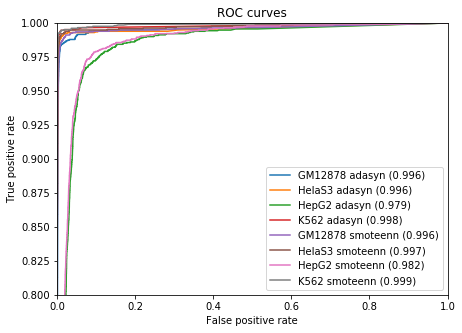

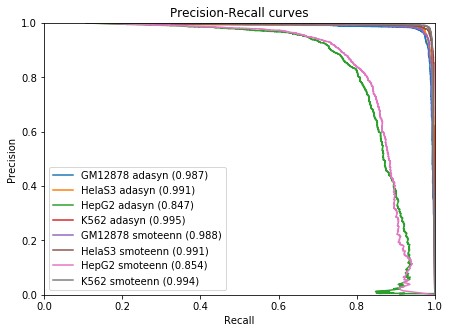

In [9]:
roc(results, 'AP-IP_4layers_150_roc.pdf')
pr(results, 'AP-IP_4layers_150_pr.pdf')

### Adasyn accuracy

In [10]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_adasyn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-P","I-P"])

print("Adasyn performance")
display(df)

Adasyn performance


Total       A-P       I-P
GM12878  0.991914  0.972028  0.994796
HelaS3   0.992313  0.987348  0.992983
HepG2    0.947796  0.938589  0.948895
K562     0.996663  0.986348  0.997943

### SMOTEENN accuracy

In [11]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_smoteenn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-P","I-P"])

print("Smoteenn performance")
display(df)

Smoteenn performance


Total       A-P       I-P
GM12878  0.987546  0.986480  0.987700
HelaS3   0.991868  0.990159  0.992098
HepG2    0.946774  0.949042  0.946504
K562     0.996125  0.991224  0.996733